In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import seaborn as sns

import itertools
from scipy.optimize import curve_fit

def get_color_for_elem(elem, mode_list, color_list):
    if elem in mode_list:
        index = mode_list.index(elem)
        return color_list[index]
    else:
        return None
    
# Function to convert oxide names to LaTeX format
def to_latex(oxide):
    return oxide.replace("2", "$_{2}$").replace("3", "$_{3}$").replace("5", "$_{5}$")

""" How to use
handles, labels = ax.get_legend_handles_labels()
labels = [to_latex(label) for label in labels]
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18, frameon=False)
"""


" How to use\nhandles, labels = ax.get_legend_handles_labels()\nlabels = [to_latex(label) for label in labels]\nax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18, frameon=False)\n"

drop_list = ['Mtn-22051302-1', 'Mtn-22051302-2', 'Mtn-22051302-3', 'Mtn-22051302-4',
       'Mtn-2011090101F', 'Mtn-22051304', 'Mtn-22051305',
       'Mtn-2011090101G', 'Mtn-22051306', 'Mtn-22051307', 'Mtn-22051308',
       'Mtn-22051309', 'Mtn-22051310', 'Mtn-22051311']

In [2]:
#drop_list = ["Mtn-2011090101A", "Mtn-2011090101B", "Mtn-2011090101C"]
drop_list = [45, 46, 47]

################################################################################################ Mode 
path_data_mode = "../0_Data/2_Compiled_Data/df_Compiled_Mineral_vol_SP8.xlsx"
data_mode = pd.read_excel(path_data_mode, index_col=1, header = 0).fillna(0)
data_mode = data_mode.drop(drop_list)

mineral_dict = {
    'Albite': {'Mineral': 'Albite', 'Color': '#B0B0D0'},
    'Quartz': {'Mineral': 'Quartz', 'Color': '#A0A0A0'},


    'Apatite': {'Mineral': 'Apatite', 'Color': '#00CED1'},
    'Graphite': {'Mineral': 'Graphite', 'Color': '#000000'},
    'Hematite': {'Mineral': 'Hematite', 'Color': '#B22222'},
    'Ilmenite': {'Mineral': 'Ilmenite', 'Color': '#3A3A3A'},
    'Pyrite': {'Mineral': 'Pyrite', 'Color': '#B8860B'},
    'Titanite': {'Mineral': 'Titanite', 'Color': '#800080'},
    'Rutile': {'Mineral': 'Rutile', 'Color': '#FF4500'},

    'Calcite': {'Mineral': 'Calcite', 'Color': '#D2B48C'},
    'Muscovite': {'Mineral': 'Muscovite', 'Color': '#FFD700'},

    'Epidote': {'Mineral': 'Epidote', 'Color': '#32CD32'},
    'Actinolite': {'Mineral': 'Actinolite', 'Color': '#228B22'}, # '#228B22', # Amphibole '#66FFCC'
    'Glaucophane': {'Mineral': 'Na-Amp', 'Color': '#000080'},
    'Chlorite': {'Mineral': 'Chlorite', 'Color': '#808000'},

}

# 辞書内のすべての Mineral 名をリストとして取得
Mineral_Qname = list(mineral_dict)
Mineral_names = [data['Mineral'] for data in mineral_dict.values()]
Mineral_c = [data['Color'] for data in mineral_dict.values()]
################################################################################################ Mode

################################################################################################ Comp
path_data_comp = "../0_Data/0_sample_excel/201105-09_四国三波川データ.xlsx"
data_comp = pd.read_excel(path_data_comp, index_col=0, header = 3, sheet_name="Compile_Filter_Renew_Karagoshi").loc[data_mode.index]
data_comp["Distance"] = data_comp["Karagoshi_Distance"].loc[data_mode.index]
data_mode["Distance"] = data_comp["Karagoshi_Distance"].loc[data_mode.index]

# col compile
T_F_XRF = data_comp.columns.str.contains("XRF")
XRF_col = data_comp.columns[T_F_XRF]

T_F_ICP = data_comp.columns.str.contains("ICP")
ICP_col = data_comp.columns[T_F_ICP]

Volatile_col = ["LOI", "TOC", "IC", "C_Total"]

dLi_col = ["JAMSTEC_dLi", "JAMSTEC_2SE", "NiigataUni_δ13C", "NiigataUni_2SE"]
dLi_dict = {
    'JAMSTEC_dLi': 'dLi', "JAMSTEC_2SE":"dLi_2SE", "NiigataUni_δ13C":"δ13C", "NiigataUni_2SE":"δ13C_2SE"
}

xrf_dict = {
    'XRF_Na2O': 'Na2O', 'XRF_MgO': 'MgO', 'XRF_Al2O3': 'Al2O3', 'XRF_SiO2': 'SiO2',
    'XRF_P2O5': 'P2O5', 'XRF_K2O': 'K2O', 'XRF_CaO': 'CaO', 'XRF_TiO2': 'TiO2',
    'XRF_MnO': 'MnO', 'XRF_Fe2O3': 'Fe2O3', 'XRF_Ig': 'Ig', 'XRF_V_': 'V',
    'XRF_Cr_': 'Cr', 'XRF_Co_': 'Co', 'XRF_Ni_': 'Ni', 'XRF_Cu_': 'Cu',
    'XRF_Zn_': 'Zn', 'XRF_As_': 'As', 'XRF_Rb_': 'Rb', 'XRF_Sr_': 'Sr',
    'XRF_Y_': 'Y', 'XRF_Zr_': 'Zr', 'XRF_Nb_': 'Nb', 'XRF_Sn_': 'Sn',
    'XRF_Sb_': 'Sb', 'XRF_Cs_': 'Cs', 'XRF_Ba_': 'Ba', 'XRF_La_': 'La',
    'XRF_Ce_': 'Ce', 'XRF_Pr_': 'Pr', 'XRF_Nd_': 'Nd', 'XRF_Pb_': 'Pb',
    'XRF_Th_': 'Th'
}
xrf_Qname = list(xrf_dict)
xrf_names = [data for data in xrf_dict.values()]

# ICP-MS 項目と化学式の対応辞書を作成
icp_ms_dict = {
    'ICP-MS_Li': 'Li', 'ICP-MS_Be': 'Be', 'ICP-MS_B': 'B', 'ICP-MS_Sc': 'Sc', 'ICP-MS_V': 'V',
    'ICP-MS_Cr': 'Cr', 'ICP-MS_Co': 'Co', 'ICP-MS_Ni': 'Ni', 'ICP-MS_Cu': 'Cu', 'ICP-MS_Zn': 'Zn',
    'ICP-MS_Ga': 'Ga', 'ICP-MS_Ge': 'Ge', 'ICP-MS_As': 'As', 'ICP-MS_Se': 'Se', 'ICP-MS_Rb': 'Rb',
    'ICP-MS_Sr': 'Sr', 'ICP-MS_Sr.1': 'Sr', 'ICP-MS_Y': 'Y', 'ICP-MS_Zr': 'Zr', 'ICP-MS_Nb': 'Nb',
    'ICP-MS_Mo': 'Mo', 'ICP-MS_Ru': 'Ru', 'ICP-MS_Rh': 'Rh', 'ICP-MS_Pf': 'Pf', 'ICP-MS_Ag': 'Ag',
    'ICP-MS_Cd': 'Cd', 'ICP-MS_In': 'In', 'ICP-MS_Sn': 'Sn', 'ICP-MS_Sb': 'Sb', 'ICP-MS_Te': 'Te',
    'ICP-MS_Cs': 'Cs', 'ICP-MS_Ba': 'Ba', 'ICP-MS_La': 'La', 'ICP-MS_Ce': 'Ce', 'ICP-MS_Pr': 'Pr',
    'ICP-MS_Nd': 'Nd', 'ICP-MS_Sm': 'Sm', 'ICP-MS_Eu': 'Eu', 'ICP-MS_Gd': 'Gd', 'ICP-MS_Tb': 'Tb',
    'ICP-MS_Dy': 'Dy', 'ICP-MS_Ho': 'Ho', 'ICP-MS_Er': 'Er', 'ICP-MS_Tm': 'Tm', 'ICP-MS_Yb': 'Yb',
    'ICP-MS_Lu': 'Lu', 'ICP-MS_Hf': 'Hf', 'ICP-MS_Ta': 'Ta', 'ICP-MS_W': 'W', 'ICP-MS_W.1': 'W',
    'ICP-MS_Re': 'Re', 'ICP-MS_Ir': 'Ir', 'ICP-MS_Pt': 'Pt', 'ICP-MS_Au': 'Au', 'ICP-MS_Tl': 'Tl',
    'ICP-MS_Pb': 'Pb', 'ICP-MS_Bi': 'Bi', 'ICP-MS_Th': 'Th', 'ICP-MS_U': 'U'
}
icp_ms_Qname = list(icp_ms_dict)
icp_ms_names = [data for data in icp_ms_dict.values()]

major_dict = {
    'XRF_Na2O': {'Mineral': 'Na2O', 'Color': '#87CEEB'},
    'XRF_MgO': {'Mineral': 'MgO', 'Color': '#4682B4'}, 
    'XRF_Al2O3': {'Mineral': 'Al2O3', 'Color': '#B0C4DE'}, 
    'XRF_SiO2': {'Mineral': 'SiO2', 'Color': '#D3D3D3'},
    'XRF_P2O5': {'Mineral': 'P2O5', 'Color': '#FFD700'},
    'XRF_K2O': {'Mineral': 'K2O', 'Color': '#FFA07A'}, 
    'XRF_CaO': {'Mineral': 'CaO', 'Color': '#F5DEB3'}, 
    'XRF_TiO2': {'Mineral': 'TiO2', 'Color': '#A9A9A9'}, 
    'XRF_MnO': {'Mineral': 'MnO', 'Color': '#800000'}, 
    'XRF_Fe2O3': {'Mineral': 'Fe2O3', 'Color': '#B22222'} 
}
Major_Qname = list(major_dict)
Major_names = [data['Mineral'] for data in major_dict.values()]
Major_c = [data['Color'] for data in major_dict.values()]

comp_all_Qname = Volatile_col + dLi_col + xrf_Qname + icp_ms_Qname
################################################################################################ Comp


# Mineral Mode

In [9]:
############################################################################### Data Compiler
def compile_mode_comp_data(data_mode, Mineral_Qname, Mineral_names, limit_distance_lower=None, limit_distance_upper=None, Isocon_x = None):
    ################################################ Dataを選択 ver 241101
    use_data_mode = data_mode[Mineral_Qname + ["Distance"]].copy()
    if limit_distance_lower is None:
        limit_distance_lower=min(use_data_mode["Distance"])
    if limit_distance_upper is None:
        limit_distance_upper=max(use_data_mode["Distance"])
    
    use_data_mode = use_data_mode[(use_data_mode['Distance'] >= limit_distance_lower) & (use_data_mode['Distance']<= limit_distance_upper)]
    use_data_mode = use_data_mode.sort_values(by="Distance")
    use_data_mode_D = use_data_mode['Distance'].round(1)
    if Isocon_x is not None:
        Isocon_x = Isocon_x.sort_values(by="Distance")
    
    # 各列の合計を計算
    total = use_data_mode[Mineral_Qname].sum(axis=1)
    # 合計を使って各列を正規化
    use_data_mode[Mineral_Qname] = use_data_mode[Mineral_Qname].div(total, axis=0)
    # カラムのリネームを辞書内包表記で一括処理
    rename_dict = dict(zip(Mineral_Qname, Mineral_names))
    use_data_mode = use_data_mode.rename(columns=rename_dict)
    
    # 0に最も近い正負の「Distance」データポイントを取得
    if (use_data_mode['Distance'] > 0).any() and (use_data_mode['Distance'] < 0).any():
        # データの処理
        nearest_positive = use_data_mode[use_data_mode['Distance'] > 0].iloc[0].copy()
        nearest_positive_name = nearest_positive.name
        nearest_positive.name = str(nearest_positive.name) + "_0"
        nearest_negative = use_data_mode[use_data_mode['Distance'] < 0].iloc[-1].copy()
        nearest_negative_name = nearest_negative.name
        nearest_negative.name = str(nearest_negative.name) + "_0"

        # それぞれのデータをx=0として追加
        nearest_positive['Distance'] = 0.001
        nearest_negative['Distance'] = -0.001

        # x_dfのデータの処理
        if Isocon_x is not None:
            # 0に最も近い正負の「Distance」データを入れる
            Isocon_x.loc[nearest_negative.name] = Isocon_x.loc[nearest_negative_name]
            Isocon_x.loc[nearest_positive.name] = Isocon_x.loc[nearest_positive_name]
            # Distanceだけ書き換える
            Isocon_x.loc[nearest_negative.name, 'Distance'] = nearest_negative['Distance']
            Isocon_x.loc[nearest_positive.name, 'Distance'] = nearest_positive['Distance']
            # Sort values
            Isocon_x = Isocon_x.sort_values(by="Distance")
    else:
        nearest_positive = None
        nearest_negative = None
    
    # データフレームに補完データを追加し、ソート
    if (nearest_positive is not None) & (nearest_negative is not None):
        use_data_mode = pd.concat([use_data_mode, nearest_positive.to_frame().T, nearest_negative.to_frame().T]).sort_values(by="Distance")
    
    ###### distance = 0にDataを補完
    ################################################Dataを選択 ver 241101
    if Isocon_x is not None:  # Isocon_xのデータがある時
        # Isoconの結果を使って、定数和制約の影響のない鉱物量比を計算
        use_data_mode[Mineral_names] = use_data_mode[Mineral_names].mul(Isocon_x["x"], axis = 0)
    return use_data_mode


def compile_trace_comp_data(data_mode, comp_all_Qname, limit_distance_lower=None, limit_distance_upper=None, Isocon_x = None):
    ################################################ Dataを選択 ver 241101
    use_data_mode = data_mode[comp_all_Qname + ["Distance"]].copy()
    if limit_distance_lower is None:
        limit_distance_lower=min(use_data_mode["Distance"])
    if limit_distance_upper is None:
        limit_distance_upper=max(use_data_mode["Distance"])
    
    use_data_mode = use_data_mode[(use_data_mode['Distance'] >= limit_distance_lower) & (use_data_mode['Distance']<= limit_distance_upper)]
    use_data_mode = use_data_mode.sort_values(by="Distance")
    use_data_mode_D = use_data_mode['Distance'].round(1)
    if Isocon_x is not None:
        Isocon_x = Isocon_x.sort_values(by="Distance")
    
    # 0に最も近い正負の「Distance」データポイントを取得
    if (use_data_mode['Distance'] > 0).any() and (use_data_mode['Distance'] < 0).any():
        # データの処理
        nearest_positive = use_data_mode[use_data_mode['Distance'] > 0].iloc[0].copy()
        nearest_positive_name = nearest_positive.name
        nearest_positive.name = str(nearest_positive.name) + "_0"
        nearest_negative = use_data_mode[use_data_mode['Distance'] < 0].iloc[-1].copy()
        nearest_negative_name = nearest_negative.name
        nearest_negative.name = str(nearest_negative.name) + "_0"

        # それぞれのデータをx=0として追加
        nearest_positive['Distance'] = 0.001
        nearest_negative['Distance'] = -0.001

        # x_dfのデータの処理
        if Isocon_x is not None:
            # 0に最も近い正負の「Distance」データを入れる
            Isocon_x.loc[nearest_negative.name] = Isocon_x.loc[nearest_negative_name]
            Isocon_x.loc[nearest_positive.name] = Isocon_x.loc[nearest_positive_name]
            # Distanceだけ書き換える
            Isocon_x.loc[nearest_negative.name, 'Distance'] = nearest_negative['Distance']
            Isocon_x.loc[nearest_positive.name, 'Distance'] = nearest_positive['Distance']
            # Sort values
            Isocon_x = Isocon_x.sort_values(by="Distance")
    else:
        nearest_positive = None
        nearest_negative = None
    
    # データフレームに補完データを追加し、ソート
    if (nearest_positive is not None) & (nearest_negative is not None):
        use_data_mode = pd.concat([use_data_mode, nearest_positive.to_frame().T, nearest_negative.to_frame().T]).sort_values(by="Distance")
    
    ###### distance = 0にDataを補完
    ################################################Dataを選択 ver 241101
    if Isocon_x is not None:  # Isocon_xのデータがある時
        # Isoconの結果を使って、定数和制約の影響のない鉱物量比を計算
        use_data_mode[comp_all_Qname] = use_data_mode[comp_all_Qname].mul(Isocon_x["x"], axis = 0)
    return use_data_mode
############################################################################### Data Compiler


############################################################################### Distance plot for Bar plot
def plot_distance(ax, use_data_mode, label_font_size, tick_font_size):
    # 距離のPlot
    ax.plot(use_data_mode.index.values, use_data_mode['Distance'].values, color='black', linestyle='-', marker='o', label='Distance')

    # データ点にラベルを付ける
    for x, y, distance in zip(use_data_mode.index.values, use_data_mode['Distance'].values, use_data_mode['Distance'].round(1).astype(str)):
        ax.text(x, y+40, distance, color="black", ha='center', va='bottom', fontsize=17, rotation=90)

    # 調整
    ax.set_xlim([-0.5, len(use_data_mode.index) - 0.5])
    ax.set_title('Sampling Point (cm)', fontdict={'fontsize': label_font_size, 'fontweight': 'bold'})
    ax.set_xticks([])
    ax.tick_params(axis='both', labelsize=tick_font_size)
    ax.yaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)

    ############################### Detect changing point over 0
    # 0を超える最初のインデックスを取得し、その位置を特定
    first_change_index_position = use_data_mode[use_data_mode['Distance'] > 0].index[0]
    first_change_index = use_data_mode.index.get_loc(first_change_index_position)
    # インデックス位置でaxvlineを引く
    ax.axvline(x=first_change_index - 0.5, color='black', linestyle='--')
    ############################### Detect changing point over 0

    # 枠線を消す
    for spine in ['top', 'bottom', 'right']:
        ax.spines[spine].set_visible(False)
############################################################################### Distance plot for Bar plot

############################################################################### Bar plot
def plot_mineral_mode_stacked_bar(ax, use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size):
    # Mineral Modeの重ね合わせ図
    bottom = None
    for column, color in zip(Mineral_names, Mineral_c):
        if bottom is None:
            ax.bar(use_data_mode.index, use_data_mode[column], label=column, color=color)
            bottom = use_data_mode[column].copy()
        else:
            ax.bar(use_data_mode.index, use_data_mode[column], bottom=bottom, label=column, color=color)
            bottom += use_data_mode[column].copy()

    # 調整
    ax.axhline(y=0, color='black', linestyle='-')
    ax.axhline(y=100, color='black', linestyle='-')
    ax.set_xlim([-0.5, len(use_data_mode.index) - 0.5])
    ax.set_ylim([0, 100])
    ax.set_ylabel('Mineral Mode (vol.%)', fontsize=label_font_size, fontweight='bold')
    ax.yaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)
    ax.tick_params(labelbottom=False, labelright=False, labeltop=False)

    # 枠線を消す
    for spine in ['top', 'bottom', 'right']:
        ax.spines[spine].set_visible(False)

    # 凡例の位置
    ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, fontsize=label_font_size)
############################################################################### Bar plot

############################################################################### Area changing plot
def plot_mineral_mode_stacked_area(ax, use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size, xlim=None, ylim=None, legend=False):
    # 初期設定
    bottom = np.zeros(len(use_data_mode))  # 底辺をゼロに初期化

    # 各 Mineral の積み上げエリアプロットを描画
    for column, color in zip(Mineral_names, Mineral_c):
        ax.fill_between(
            use_data_mode["Distance"],
            bottom,
            bottom + use_data_mode[column],
            label=column,
            color=color,
            alpha=0.7
        )
        bottom += use_data_mode[column]  # 次の鉱物のために底辺を更新

    # グラフの調整
    ax.axhline(y=0, color='black', linestyle='-')
    ax.axhline(y=100, color='black', linestyle='-')

    # X軸
    ax.set_xlabel('Distance (cm)', fontsize=label_font_size, fontweight='bold')
    ax.xaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)    

    # Y軸
    ax.set_ylabel('Mineral Mode (vol.%)', fontsize=label_font_size, fontweight='bold')
    ax.yaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)

    if xlim is None: # x_limの設定
        ax.set_xlim([use_data_mode["Distance"].min(), use_data_mode["Distance"].max()])
    else:
        ax.set_xlim(xlim)

    if ylim is None: # x_limの設定
        ax.set_ylim([0, 100])
    else:
        ax.set_ylim(ylim)
    
    # 枠線を消す
    for spine in ['top', 'bottom', 'right']:
        ax.spines[spine].set_visible(False)

    # 凡例の配置
    if legend != False:
        ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, fontsize=label_font_size)

def plot_major_composition_stacked_area(ax, use_data, Major_names, Major_c, label_font_size, tick_font_size, xlim=None, ylim=None, legend=False):
    # 初期設定
    bottom = np.zeros(len(use_data))  # 底辺をゼロに初期化

    # 各 Major 成分の積み上げエリアプロットを描画
    for column, color in zip(Major_names, Major_c):
        ax.fill_between(
            use_data["Distance"],
            bottom,
            bottom + use_data[column],
            label=column,
            color=color,
            alpha=0.7
        )
        bottom += use_data[column]  # 次の成分のために底辺を更新

    # グラフの調整
    ax.axhline(y=0, color='black', linestyle='-')
    ax.axhline(y=100, color='black', linestyle='-')
    
    #x軸
    ax.set_xlabel('Distance (cm)', fontsize=label_font_size, fontweight='bold')
    ax.xaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)        
    #y軸
    ax.set_ylabel('Major element content (wt.%)', fontsize=label_font_size, fontweight='bold')
    ax.yaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)

    if xlim is None: # x_limの設定
        ax.set_xlim([use_data_mode["Distance"].min(), use_data_mode["Distance"].max()])
    else:
        ax.set_xlim(xlim)

    if ylim is None: # x_limの設定
        ax.set_ylim([0, 100])
    else:
        ax.set_ylim(ylim)
    
    # 枠線を消す
    for spine in ['top', 'bottom', 'right']:
        ax.spines[spine].set_visible(False)

    # 凡例の配置
    if legend != False:
        ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, fontsize=label_font_size)
############################################################################### Area changing plot

############################################################################### Line Plot of Combined with Bar plot 
def plot_mineral_mode_line(ax, use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size):
    # Mineral Modeの Line Plot
    for column, color in zip(Mineral_names, Mineral_c):
        ax.plot(use_data_mode.index.values, use_data_mode[column].values,
                linestyle='-', marker='o', label=column, markersize=15, linewidth=5,
                c=color, markeredgecolor="black", markeredgewidth=2)

    # 調整
    ax.set_xlim([-0.5, len(use_data_mode.index) - 0.5])
    ax.tick_params(axis='y', labelsize=tick_font_size)
    ax.set_ylabel('Mineral Mode (vol.%)', fontsize=label_font_size, fontweight='bold')
    ax.yaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)
    ax.tick_params(labelbottom=False, labelright=False, labeltop=False)

    # 枠線を消す
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    # 凡例の位置
    ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, fontsize=label_font_size)

def plot_major_composition_line(ax, use_data, Major_names, Major_c, label_font_size, tick_font_size, ylim=None):
    # major elemの Line Plot
    for column, color in zip(Major_names, Major_c):
        ax.plot(
            use_data.index.values, use_data[column].values,
            linestyle='-', marker='o', label=column, markersize=15, linewidth=5,
            color=color, markeredgecolor="black", markeredgewidth=2
        )

    # 調整
    ax.set_xlim([-0.5, len(use_data.index) - 0.5])
    if ylim is not None: # x_limの設定
        ax.set_ylim(ylim)

    # 枠線を消す
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    # Y軸の設定
    ax.tick_params(axis='y', labelsize=tick_font_size)
    ax.set_ylabel('Element composition (wt.%)', fontsize=label_font_size, fontweight='bold')
    ax.yaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)

    # X軸の目盛りを非表示
    ax.tick_params(labelbottom=False, labelright=False, labeltop=False)

    # 凡例の配置
    ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, fontsize=label_font_size)

def plot_composition_line(ax, use_data, columns, colormap_name, label_font_size, tick_font_size, ylim=None, yscale="linear"):
    # カラーマップから色を取得
    colormap = plt.get_cmap(colormap_name)
    colors = [colormap(i / len(columns)) for i in range(len(columns))]
    
    # major elemの Line Plot
    for column, color in zip(columns, colors):
        ax.plot(
            use_data.index.values, use_data[column].values,
            linestyle='-', marker='o', label=column, markersize=15, linewidth=5,
            color=color, markeredgecolor="black", markeredgewidth=2
        )

    # 調整
    ax.set_xlim([-0.5, len(use_data.index) - 0.5])
    if ylim is not None: # x_limの設定
        ax.set_ylim(ylim)

    # 枠線を消す
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    # Y軸の設定
    ax.tick_params(axis='y', labelsize=tick_font_size)
    ax.set_ylabel('Element comp', fontsize=label_font_size, fontweight='bold')
    ax.set_yscale(yscale)
    ax.yaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)

    # X軸の目盛りを非表示
    #ax.tick_params(labelbottom=False, labelright=False, labeltop=False)

    # 凡例の配置
    ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, fontsize=label_font_size)
############################################################################### Line Plot of Combined with Bar plot 

############################################################################### Distance Plot
def plot_major_mode_elements(ax, use_data, columns, colors, label_font_size, tick_font_size, yax_loc=-0.1, linewidth=5, markeredgewidth=5, yscale="linear", xlim=None):
    
    # 初期の軸
    axes = [ax]

    # 最初のプロット
    axes[0].plot(
        use_data["Distance"].values, use_data[columns[0]].values,
        linestyle='-', marker='o', label=columns[0], markersize=30, linewidth=linewidth,
        color=colors[0], markerfacecolor='none', markeredgecolor=colors[0], markeredgewidth=markeredgewidth
    )
    axes[0].tick_params(axis='y', direction='in', which="both", labelsize=tick_font_size, colors=colors[0])
    axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))

    # twinx を追加して残りのカラムをプロット
    for i in range(1, len(columns)):
        ax_twin = axes[0].twinx()
        ax_twin.plot(
            use_data["Distance"].values, use_data[columns[i]].values,
            linestyle='-', marker='o', label=columns[i], markersize=30, linewidth=linewidth,
            color=colors[i], markerfacecolor='none', markeredgecolor=colors[i], markeredgewidth=markeredgewidth
        )

        # 軸を左側に配置
        ax_twin.spines["left"].set_position(("axes", yax_loc * i))
        ax_twin.yaxis.set_ticks_position("left")
        ax_twin.yaxis.set_label_position("left")
        ax_twin.tick_params(axis='y', direction='in', which="both", labelsize=tick_font_size, colors=colors[i])
        ax_twin.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))

        # 左側のspineとラベルに色を設定
        ax_twin.spines["left"].set_color(colors[i])
        ax_twin.yaxis.label.set_color(colors[i])

        # 右側のspineを無効化
        ax_twin.spines["right"].set_visible(False)

        # 軸のリストに追加
        axes.append(ax_twin)

    # 凡例の収集と表示
    handles, labels = [], []
    for ax_ in axes:
        h, l = ax_.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)

    # LaTex形式に変換して、下つき文字に変更
    labels = [to_latex(label) for label in labels]

    axes[0].legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, fontsize=label_font_size)

    # 枠線とTickの修正
    for ax_ in axes:
        ax_.set_ylim([0, None])
        if xlim is not None:
            ax_.set_xlim(xlim)
        for spine in ['top', 'right']:
            ax_.spines[spine].set_visible(False)
        ax_.xaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)
        ax_.yaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)


def plot_trace_elements(ax, use_data, columns, colormap_name, label_font_size, tick_font_size, yax_loc=-0.1, linewidth=5, markeredgewidth=5, yscale="linear", xlim=None, ylim=None, scatter_only=False):
    # カラーマップから色を取得
    colormap = plt.get_cmap(colormap_name)
    colors = [colormap(i / len(columns)) for i in range(len(columns))]

    # 初期の軸
    axes = [ax]
    
    if scatter_only==False:
        # 最初のプロット
        axes[0].plot(
            use_data["Distance"].values, use_data[columns[0]].values,
            linestyle='-', marker='o', label=columns[0], markersize=30, linewidth=linewidth,
            color=colors[0], markerfacecolor='none', markeredgecolor=colors[0], markeredgewidth=markeredgewidth
        )
    else:
        axes[0].scatter(
            use_data["Distance"].values, use_data[columns[0]].values,
            marker='o', label=columns[0], s=500,
            edgecolors=colors[0], facecolors='none', linewidths=markeredgewidth
        )  
    axes[0].tick_params(axis='y', direction='in', which="both", labelsize=tick_font_size, colors=colors[0])
    axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))

    # twinx を追加して残りのカラムをプロット
    for i in range(1, len(columns)):
        ax_twin = axes[0].twinx()
        ax_twin.plot(
            use_data["Distance"].values, use_data[columns[i]].values,
            linestyle='-', marker='o', label=columns[i], markersize=30, linewidth=linewidth,
            color=colors[i], markerfacecolor='none', markeredgecolor=colors[i], markeredgewidth=markeredgewidth
        )

        # 軸を左側に配置
        ax_twin.spines["left"].set_position(("axes", yax_loc * i))
        ax_twin.yaxis.set_ticks_position("left")
        ax_twin.yaxis.set_label_position("left")
        ax_twin.tick_params(axis='y', direction='in', which="both", labelsize=tick_font_size, colors=colors[i])
        ax_twin.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))

        # 左側のspineとラベルに色を設定
        ax_twin.spines["left"].set_color(colors[i])
        ax_twin.yaxis.label.set_color(colors[i])

        # 右側のspineを無効化
        ax_twin.spines["right"].set_visible(False)

        # 軸のリストに追加
        axes.append(ax_twin)

    if xlim is not None: # x_limの設定
        ax.set_xlim(xlim)
    if ylim is not None: # y_limの設定
        ax.set_ylim(ylim)
        
    # 凡例の収集と表示
    handles, labels = [], []
    for ax_ in axes:
        h, l = ax_.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
    axes[0].legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, fontsize=label_font_size)

    # 枠線とTickの修正
    for ax_ in axes:
        if ylim is None:
            ax_.set_ylim([0, None])
        for spine in ['top', 'right']:
            ax_.spines[spine].set_visible(False)
        ax_.xaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)
        ax_.yaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)

def plot_trace_elements_isotope(ax, use_data, columns, colormap_name, label_font_size, tick_font_size, yax_loc=-0.1, linewidth=5, markeredgewidth=5, yscale="linear", xlim=None, ylim=None, scatter_only=False):
    # カラーマップから色を取得
    colormap = plt.get_cmap(colormap_name)
    colors = [colormap(i / len(columns)) for i in range(len(columns))]

    # 初期の軸
    axes = [ax]
    
    if scatter_only==False:
        # 最初のプロット
        axes[0].plot(
            use_data["Distance"].values, use_data[columns[0]].values,
            linestyle='-', marker='o', label=columns[0], markersize=30, linewidth=linewidth,
            color=colors[0], markerfacecolor='none', markeredgecolor=colors[0], markeredgewidth=markeredgewidth
        )
    else:
        axes[0].scatter(
            use_data["Distance"].values, use_data[columns[0]].values,
            marker='o', label=columns[0], s=500,
            edgecolors=colors[0], facecolors='none', linewidths=markeredgewidth
        )  
    axes[0].tick_params(axis='y', direction='in', which="both", labelsize=tick_font_size, ) #colors=colors[0]
    axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))

    if xlim is not None: # x_limの設定
        ax.set_xlim(xlim)
    if ylim is not None: # y_limの設定
        ax.set_ylim(ylim)
        
    # 凡例の収集と表示
    handles, labels = [], []
    for ax_ in axes:
        h, l = ax_.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
    axes[0].legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, fontsize=label_font_size)

    # 枠線とTickの修正
    for ax_ in axes:
        if ylim is None:
            ax_.set_ylim([0, None])
        #for spine in ['top', 'right']:
        #    ax_.spines[spine].set_visible(False)
        ax_.xaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size, length=10, width=3)
        ax_.yaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size, length=10, width=3)


def plot_trace_elements_with_error(ax, use_data, columns, error_value, colormap_name, label_font_size, tick_font_size, yax_loc=-0.1, linewidth=5, markeredgewidth=5, yscale="linear", xlim=None, ylim=None):
    # カラーマップから色を取得
    colormap = plt.get_cmap(colormap_name)
    colors = [colormap(i / len(columns)) for i in range(len(columns))]

    # 初期の軸
    axes = [ax]

    # 最初のプロット（エラーバー付き）
    axes[0].errorbar(
        use_data["Distance"].values, use_data[columns[0]].values,
        yerr=error_value,  # 均一なエラーバーの長さ
        linestyle='-', marker='o', label=columns[0], markersize=30, linewidth=linewidth,
        color=colors[0], markerfacecolor='none', markeredgecolor=colors[0], markeredgewidth=markeredgewidth,
        capsize=5  # エラーバーの端の線の長さ
    )
    axes[0].tick_params(axis='y', direction='in', which="both", labelsize=tick_font_size, colors=colors[0])
    axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))

    # twinx を追加して残りのカラムをプロット（エラーバー付き）
    for i in range(1, len(columns)):
        ax_twin = axes[0].twinx()
        ax_twin.errorbar(
            use_data["Distance"].values, use_data[columns[i]].values,
            yerr=error_value,  # エラーバーの長さ
            linestyle='-', marker='o', label=columns[i], markersize=30, linewidth=linewidth,
            color=colors[i], markerfacecolor='none', markeredgecolor=colors[i], markeredgewidth=markeredgewidth,
            capsize=5
        )

        # 軸を左側に配置
        ax_twin.spines["left"].set_position(("axes", yax_loc * i))
        ax_twin.yaxis.set_ticks_position("left")
        ax_twin.yaxis.set_label_position("left")
        ax_twin.tick_params(axis='y', direction='in', which="both", labelsize=tick_font_size, colors=colors[i])
        ax_twin.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))

        # 左側のspineとラベルに色を設定
        ax_twin.spines["left"].set_color(colors[i])
        ax_twin.yaxis.label.set_color(colors[i])

        # 右側のspineを無効化
        ax_twin.spines["right"].set_visible(False)

        # 軸のリストに追加
        axes.append(ax_twin)
    
    if xlim is not None: # x_limの設定
        ax.set_xlim(xlim)
    if ylim is not None: # y_limの設定
        ax.set_ylim(ylim)
        
    # 凡例の収集と表示
    handles, labels = [], []
    for ax_ in axes:
        h, l = ax_.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
    axes[0].legend(handles, labels, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0, fontsize=label_font_size)

    # 枠線とTickの修正
    for ax_ in axes:
        if ylim is None:
            ax_.set_ylim([0, None])
        for spine in ['top', 'right']:
            ax_.spines[spine].set_visible(False)
        ax_.xaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)
        ax_.yaxis.set_tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True, labelsize=tick_font_size)
############################################################################### Distance Plot


############################################################################### Figure Ending
def plot_output(ax, path):
    # Adjust layout
    plt.tight_layout()
    fig.align_labels([ax])
    plt.savefig(path, bbox_inches='tight')
    
    # Show or save the plot
    plt.show()
############################################################################### Figure Ending


""" 
Template

################################################ Data Read
limit_d = [-200, 200]

use_data_mode = compile_mode_comp_data(data_mode, Mineral_Qname, Mineral_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1], Isocon_x = df_x)
use_data_major_comp = compile_mode_comp_data(data_comp, Major_Qname, Major_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1], Isocon_x = df_x)

use_data_mode[Mineral_names] = use_data_mode[Mineral_names]*100
use_data_major_comp[Major_names] = use_data_major_comp[Major_names]*100

use_data_comp = compile_trace_comp_data(data_comp, comp_all_Qname, limit_distance_upper=350, Isocon_x = df_x)

use_delta_Cmp = compile_trace_comp_data(delta_Cmp_df, comp_all_Qname, limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1])
use_element_mobility = compile_trace_comp_data(element_mobility_df, comp_all_Qname, limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1])
################################################ Data Read

################################ Major/Mineral Extraction
col_minerals = ['Albite', 'Quartz', 'Titanite', 'Calcite', 'Muscovite', 'Chlorite'] 
col_minerals = ['Albite', 'Muscovite', 'Chlorite', 'Quartz',] 
col_matching_mineral_c = pd.Series(Mineral_c)[pd.Series(Mineral_names).isin(col_minerals)].to_list()

col_major = ['Na2O', 'MgO', 'Al2O3','K2O', 'CaO', 'TiO2',] # 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3'
col_matching_major_c = pd.Series(Major_c)[pd.Series(Major_names).isin(col_major)].to_list()
################################ Major/Mineral Extraction


################################################ Figure main part setting
# サブプロットを作成
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(60, 25), gridspec_kw={'height_ratios': [5, 5]})
label_font_size = 25
tick_font_size = 20
path = "../0_Figure_Isocon/Mineral_Mode_Sum.pdf"
################################################ Figure main part setting

#plot_distance(ax[0], use_data_mode, label_font_size, tick_font_size)
#plot_mineral_mode_stacked_bar(ax[1], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size)
#plot_mineral_mode_line(ax[2], use_data_mode*100, Mineral_names, Mineral_c, label_font_size, tick_font_size)
#plot_mineral_mode_stacked_area(ax[2], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size, xlim=[-200, 150], ylim=[0, 150])
#plot_major_composition_stacked_area(ax[2], use_data_comp, Major_names, Major_c, label_font_size, tick_font_size)
#plot_major_composition_line(ax[2], use_data_major_comp, Major_names, Major_c, label_font_size, tick_font_size,)
#plot_major_composition_line(ax[2], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size,)
#plot_trace_elements(ax[2], use_data_comp, ["JAMSTEC_dLi", "IC"], 'viridis', label_font_size, tick_font_size, yax_loc = -0.01,)
#plot_trace_elements_with_error(ax[2], use_data_comp, ["JAMSTEC_dLi"], 0.41, 'viridis', label_font_size, tick_font_size)
#plot_composition_line(ax[2], use_data_comp, ["JAMSTEC_dLi", "IC"], 'viridis', label_font_size, tick_font_size, ylim=None, yscale="log")

#plot_trace_elements(ax[2], use_data_mode, [], Mineral_names, label_font_size, tick_font_size, yax_loc = -0.06,)
#plot_major_mode_elements(ax[1], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size, yax_loc=-0.01)

#plot_output(ax, path)



# Template 2
col_minerals = ['Quartz', 'Muscovite', 'Chlorite'] 
col_matching_colors = [mineral_dict[mineral]['Color'] for mineral in col_minerals if mineral in mineral_dict]
plot_major_mode_elements(ax[0], use_data_mode, col_minerals, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.04)

col_major = ['K2O', 'MgO', 'SiO2', 'Al2O3',] # 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3'
col_matching_colors = [
    item['Color'] for mineral in col_major 
    for key, item in major_dict.items() if item['Mineral'] == mineral
]
plot_major_mode_elements(ax[1], use_data_major_comp, col_major, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.04)

col_minerals = [ 'Albite', 'Titanite', 'Epidote',] 
col_matching_colors = [mineral_dict[mineral]['Color'] for mineral in col_minerals if mineral in mineral_dict]
plot_major_mode_elements(ax[2], use_data_mode, col_minerals, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.04)

col_major = ['Na2O', 'TiO2', 'Fe2O3', 'CaO'] # 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3'
col_matching_colors = [
    item['Color'] for mineral in col_major 
    for key, item in major_dict.items() if item['Mineral'] == mineral
]
plot_major_mode_elements(ax[3], use_data_major_comp, col_major, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.04)

plot_output(ax, path)
"""


' \nTemplate\n\n################################################ Data Read\nlimit_d = [-200, 200]\n\nuse_data_mode = compile_mode_comp_data(data_mode, Mineral_Qname, Mineral_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1], Isocon_x = df_x)\nuse_data_major_comp = compile_mode_comp_data(data_comp, Major_Qname, Major_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1], Isocon_x = df_x)\n\nuse_data_mode[Mineral_names] = use_data_mode[Mineral_names]*100\nuse_data_major_comp[Major_names] = use_data_major_comp[Major_names]*100\n\nuse_data_comp = compile_trace_comp_data(data_comp, comp_all_Qname, limit_distance_upper=350, Isocon_x = df_x)\n\nuse_delta_Cmp = compile_trace_comp_data(delta_Cmp_df, comp_all_Qname, limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1])\nuse_element_mobility = compile_trace_comp_data(element_mobility_df, comp_all_Qname, limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1])\n############################

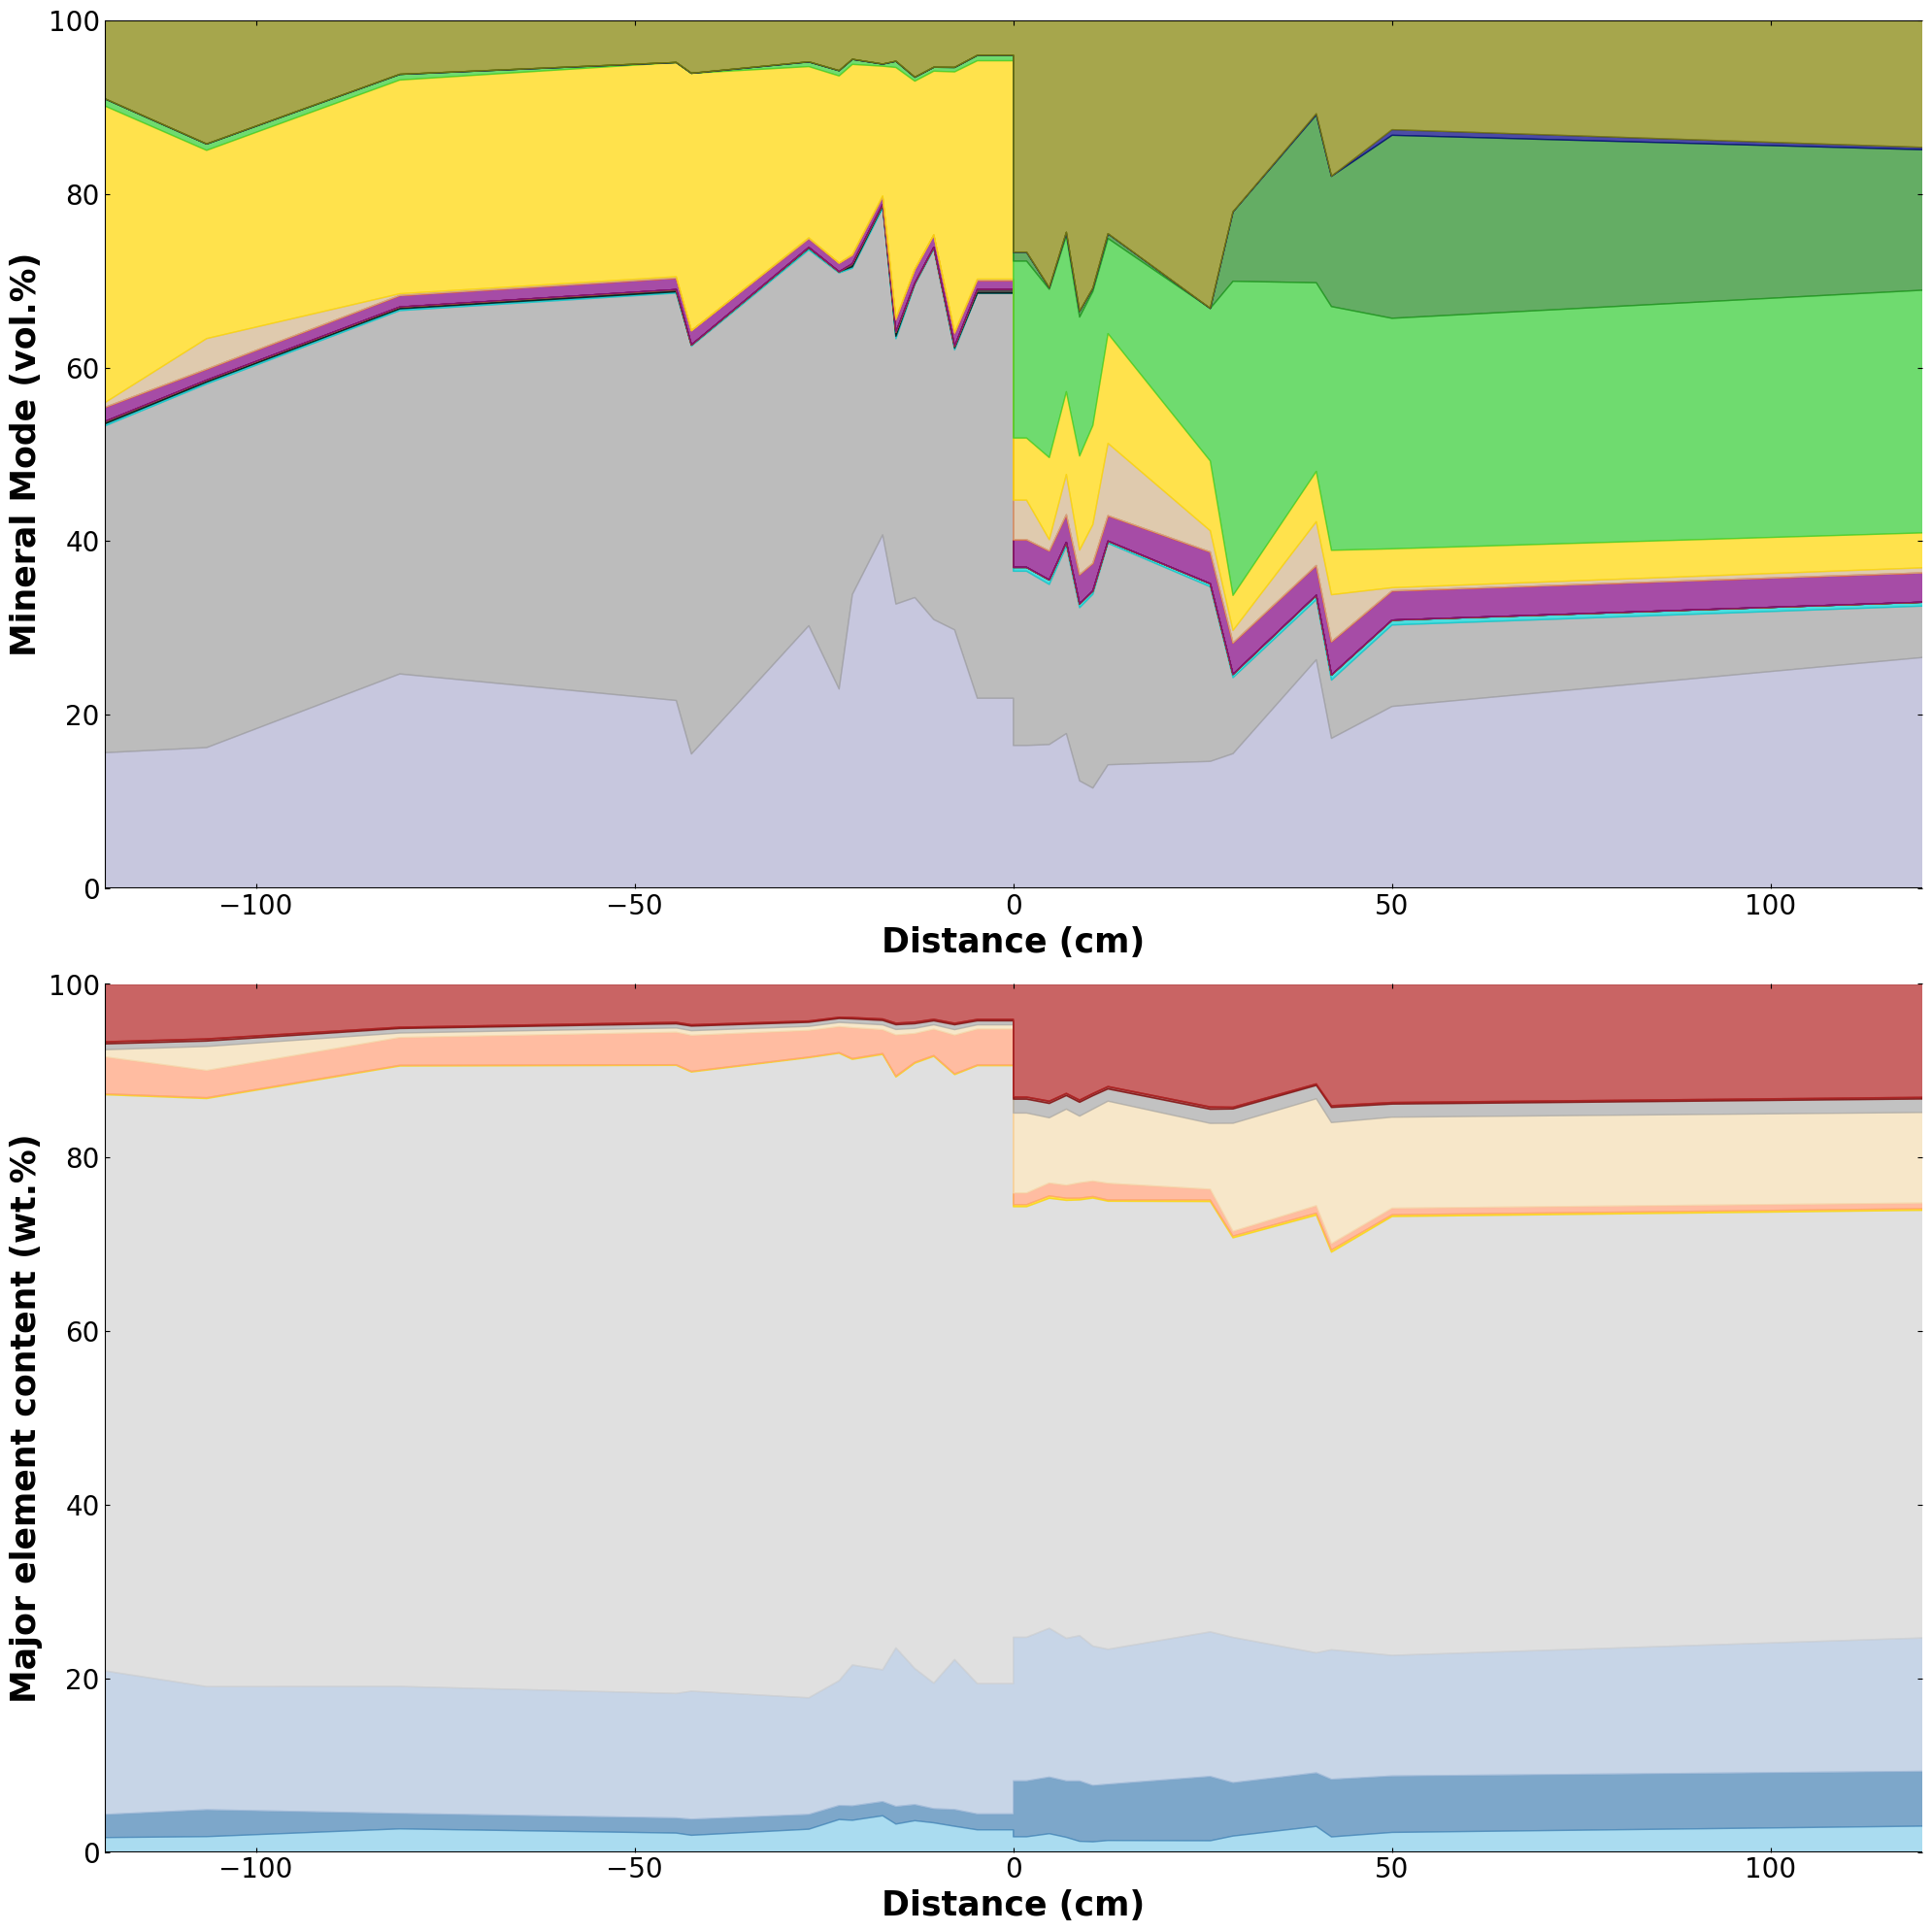

In [10]:
################################################ Data Read
limit_d = [-200, 200]
use_data_mode = compile_mode_comp_data(data_mode, Mineral_Qname, Mineral_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1], )
use_data_major_comp = compile_mode_comp_data(data_comp, Major_Qname, Major_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1],)

use_data_mode[Mineral_names] = use_data_mode[Mineral_names]*100
use_data_major_comp[Major_names] = use_data_major_comp[Major_names]*100
################################################ Data Read

################################ Major/Mineral Extraction
#col_minerals = ['Albite', 'Quartz', 'Titanite', 'Calcite', 'Muscovite', 'Chlorite'] 
#col_minerals = ['Albite', 'Muscovite', 'Chlorite', 'Quartz',] 
#col_matching_mineral_c = pd.Series(Mineral_c)[pd.Series(Mineral_names).isin(col_minerals)].to_list()

#col_major = ['Na2O', 'MgO', 'Al2O3','K2O', 'CaO', 'TiO2',] # 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3'
#col_matching_major_c = pd.Series(Major_c)[pd.Series(Major_names).isin(col_major)].to_list()
################################ Major/Mineral Extraction


################################################ Figure main part setting
# サブプロットを作成
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 20), gridspec_kw={'height_ratios': [5, 5]})
label_font_size = 25
tick_font_size = 20
path = "../0_Data/3_Figure/Mineral_Mode_Sum.pdf"
################################################ Figure main part setting

#plot_distance(ax[0], use_data_mode, label_font_size, tick_font_size)
#plot_mineral_mode_stacked_bar(ax[1], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size)
#plot_mineral_mode_line(ax[2], use_data_mode*100, Mineral_names, Mineral_c, label_font_size, tick_font_size)
plot_mineral_mode_stacked_area(ax[0], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size, ylim=[0, 100], xlim=[-120, 120], legend=False)
plot_major_composition_stacked_area(ax[1], use_data_major_comp, Major_names, Major_c, label_font_size, tick_font_size, ylim=[0, 100], xlim=[-120, 120], legend=False)
#plot_major_composition_line(ax[2], use_data_major_comp, Major_names, Major_c, label_font_size, tick_font_size,)
#plot_major_composition_line(ax[2], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size,ylim=[0, 100], xlim=[-120, 120])
#plot_trace_elements(ax[2], use_data_comp, ["JAMSTEC_dLi", "IC"], 'viridis', label_font_size, tick_font_size, yax_loc = -0.01,)
#plot_trace_elements_with_error(ax[2], use_data_comp, ["JAMSTEC_dLi"], 0.41, 'viridis', label_font_size, tick_font_size)
#plot_composition_line(ax[2], use_data_comp, ["JAMSTEC_dLi", "IC"], 'viridis', label_font_size, tick_font_size, ylim=None, yscale="log")

plot_output(ax, path)


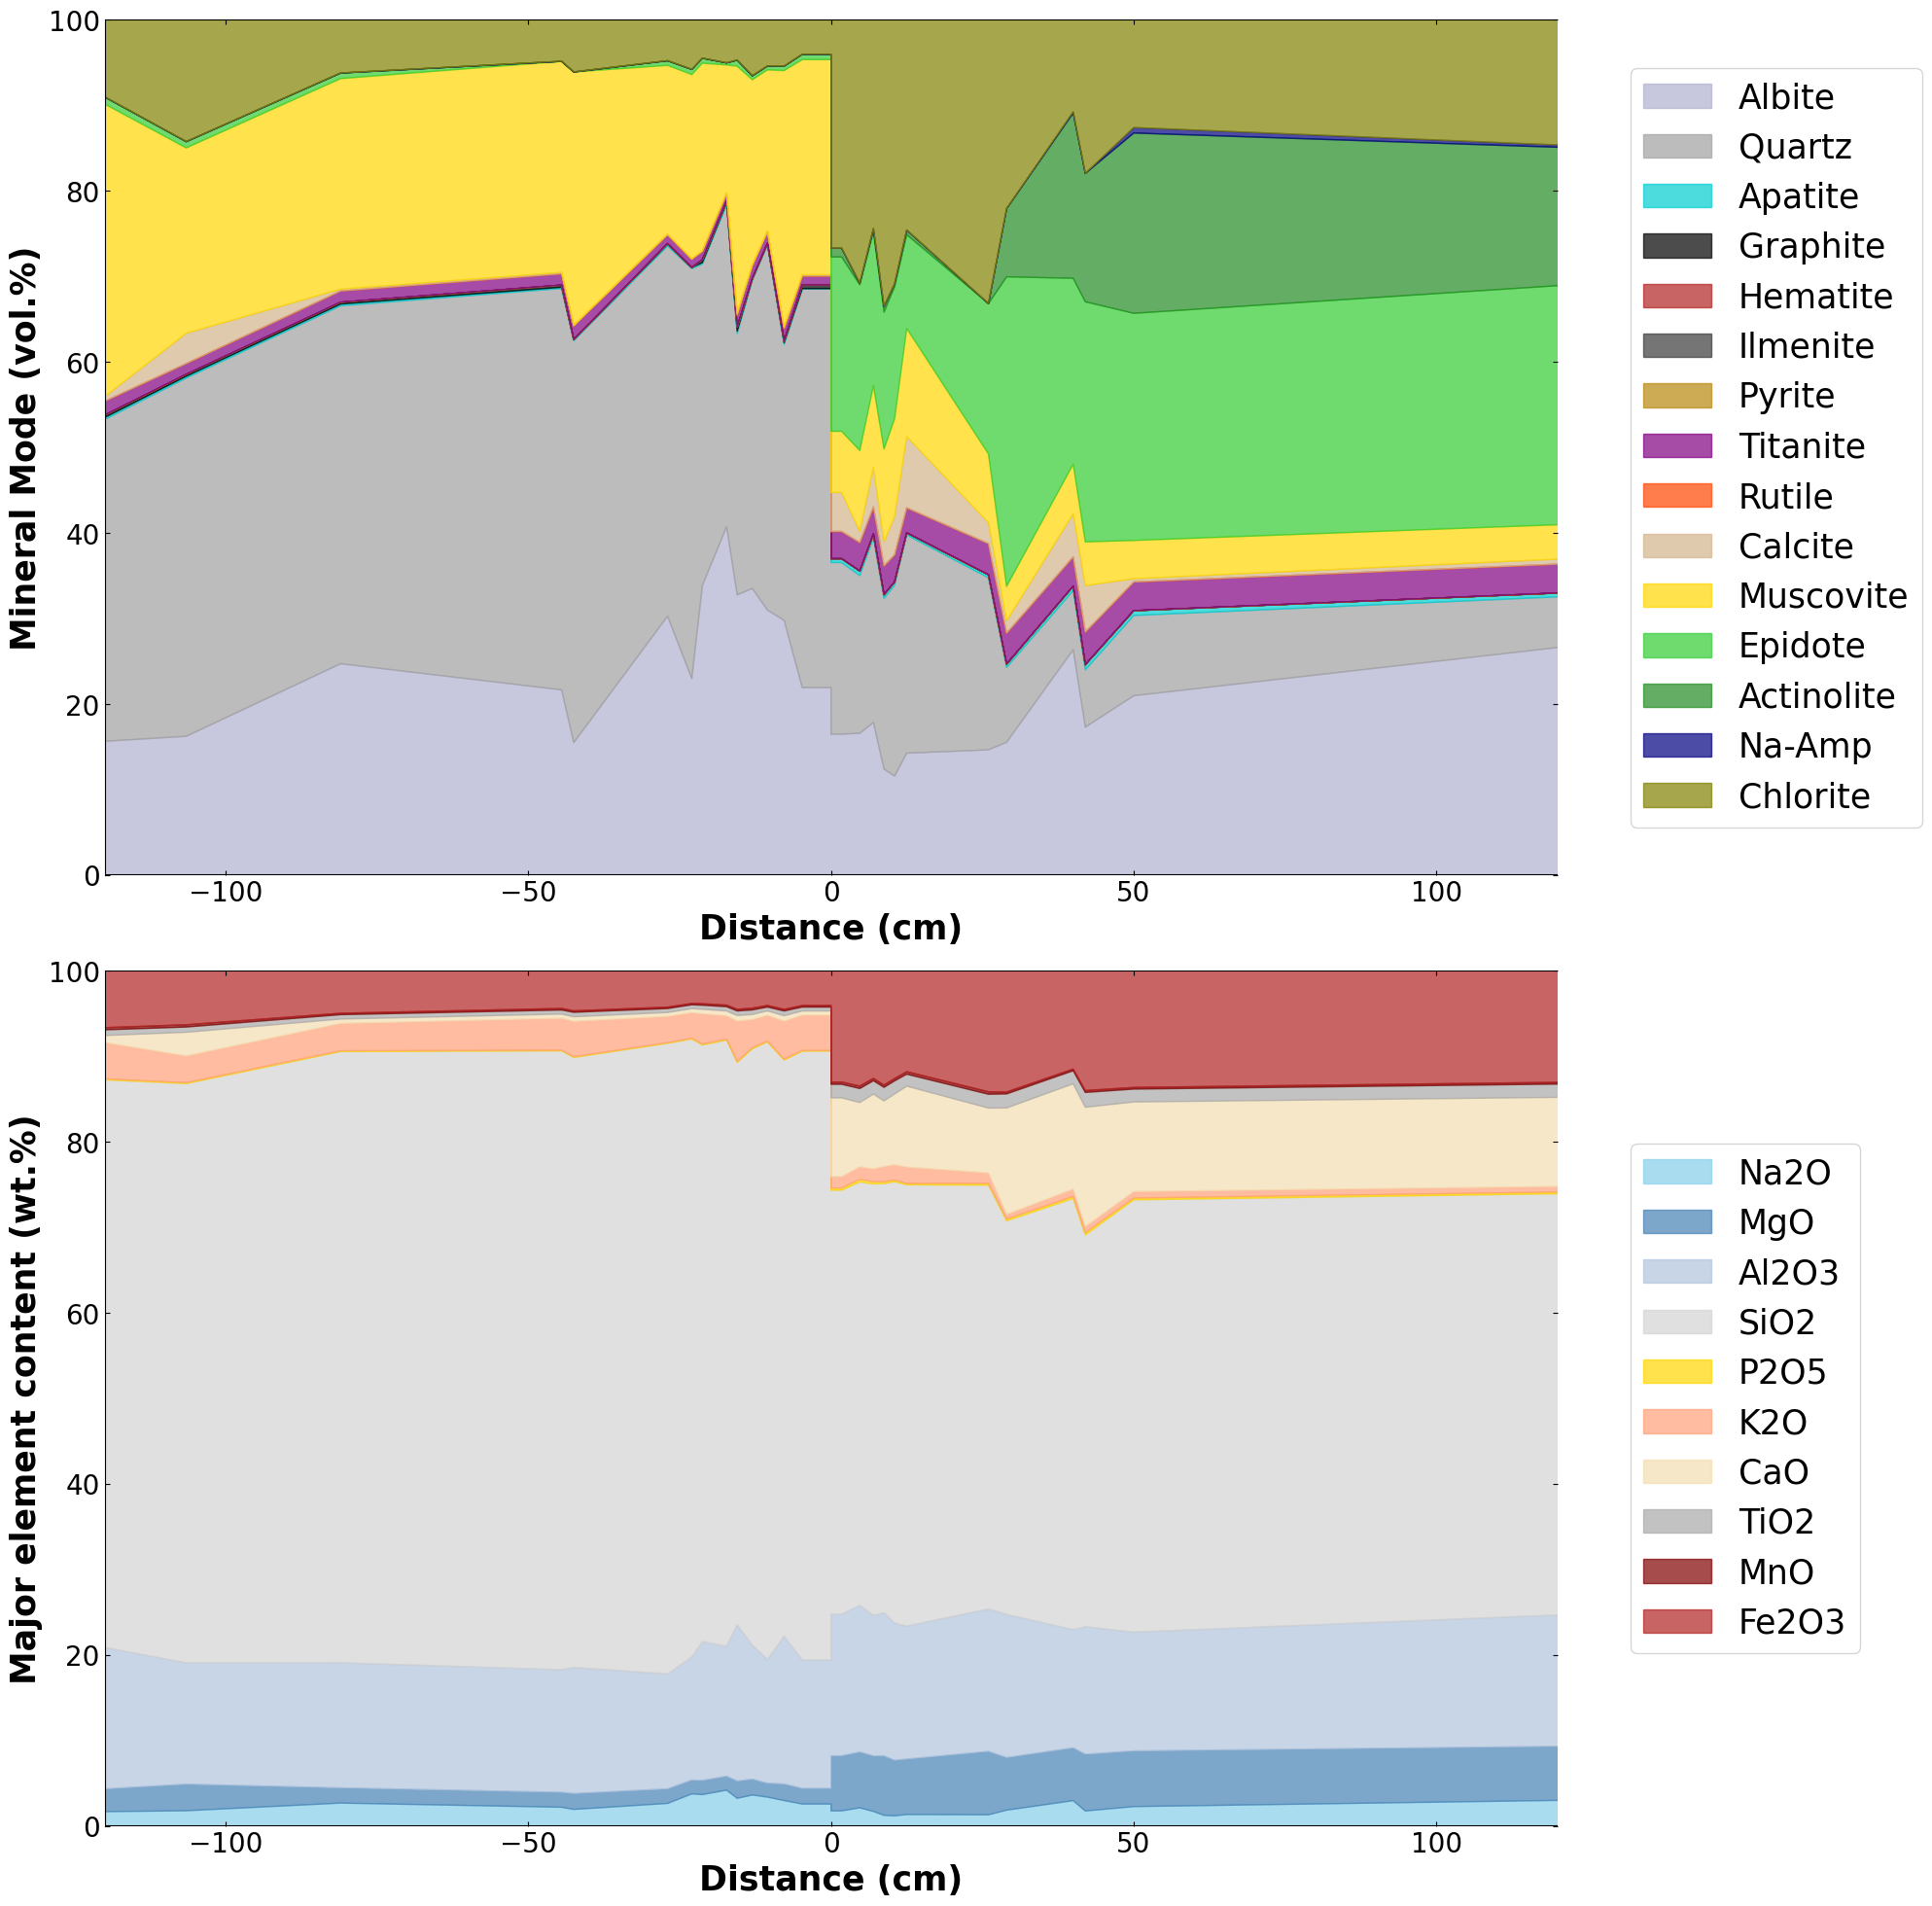

In [11]:
################################################ Data Read
limit_d = [-200, 200]
use_data_mode = compile_mode_comp_data(data_mode, Mineral_Qname, Mineral_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1], )
use_data_major_comp = compile_mode_comp_data(data_comp, Major_Qname, Major_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1],)

use_data_mode[Mineral_names] = use_data_mode[Mineral_names]*100
use_data_major_comp[Major_names] = use_data_major_comp[Major_names]*100
################################################ Data Read

################################ Major/Mineral Extraction
#col_minerals = ['Albite', 'Quartz', 'Titanite', 'Calcite', 'Muscovite', 'Chlorite'] 
#col_minerals = ['Albite', 'Muscovite', 'Chlorite', 'Quartz',] 
#col_matching_mineral_c = pd.Series(Mineral_c)[pd.Series(Mineral_names).isin(col_minerals)].to_list()

#col_major = ['Na2O', 'MgO', 'Al2O3','K2O', 'CaO', 'TiO2',] # 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3'
#col_matching_major_c = pd.Series(Major_c)[pd.Series(Major_names).isin(col_major)].to_list()
################################ Major/Mineral Extraction


################################################ Figure main part setting
# サブプロットを作成
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 20), gridspec_kw={'height_ratios': [5, 5]})
label_font_size = 25
tick_font_size = 20
path = "../0_Data/3_Figure/Mineral_Mode_Sum_legend.pdf"
################################################ Figure main part setting

#plot_distance(ax[0], use_data_mode, label_font_size, tick_font_size)
#plot_mineral_mode_stacked_bar(ax[1], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size)
#plot_mineral_mode_line(ax[2], use_data_mode*100, Mineral_names, Mineral_c, label_font_size, tick_font_size)
plot_mineral_mode_stacked_area(ax[0], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size, ylim=[0, 100], xlim=[-120, 120], legend=True)
plot_major_composition_stacked_area(ax[1], use_data_major_comp, Major_names, Major_c, label_font_size, tick_font_size, ylim=[0, 100], xlim=[-120, 120], legend=True)
#plot_major_composition_line(ax[2], use_data_major_comp, Major_names, Major_c, label_font_size, tick_font_size,)
#plot_major_composition_line(ax[2], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size,ylim=[0, 100], xlim=[-120, 120])
#plot_trace_elements(ax[2], use_data_comp, ["JAMSTEC_dLi", "IC"], 'viridis', label_font_size, tick_font_size, yax_loc = -0.01,)
#plot_trace_elements_with_error(ax[2], use_data_comp, ["JAMSTEC_dLi"], 0.41, 'viridis', label_font_size, tick_font_size)
#plot_composition_line(ax[2], use_data_comp, ["JAMSTEC_dLi", "IC"], 'viridis', label_font_size, tick_font_size, ylim=None, yscale="log")

plot_output(ax, path)


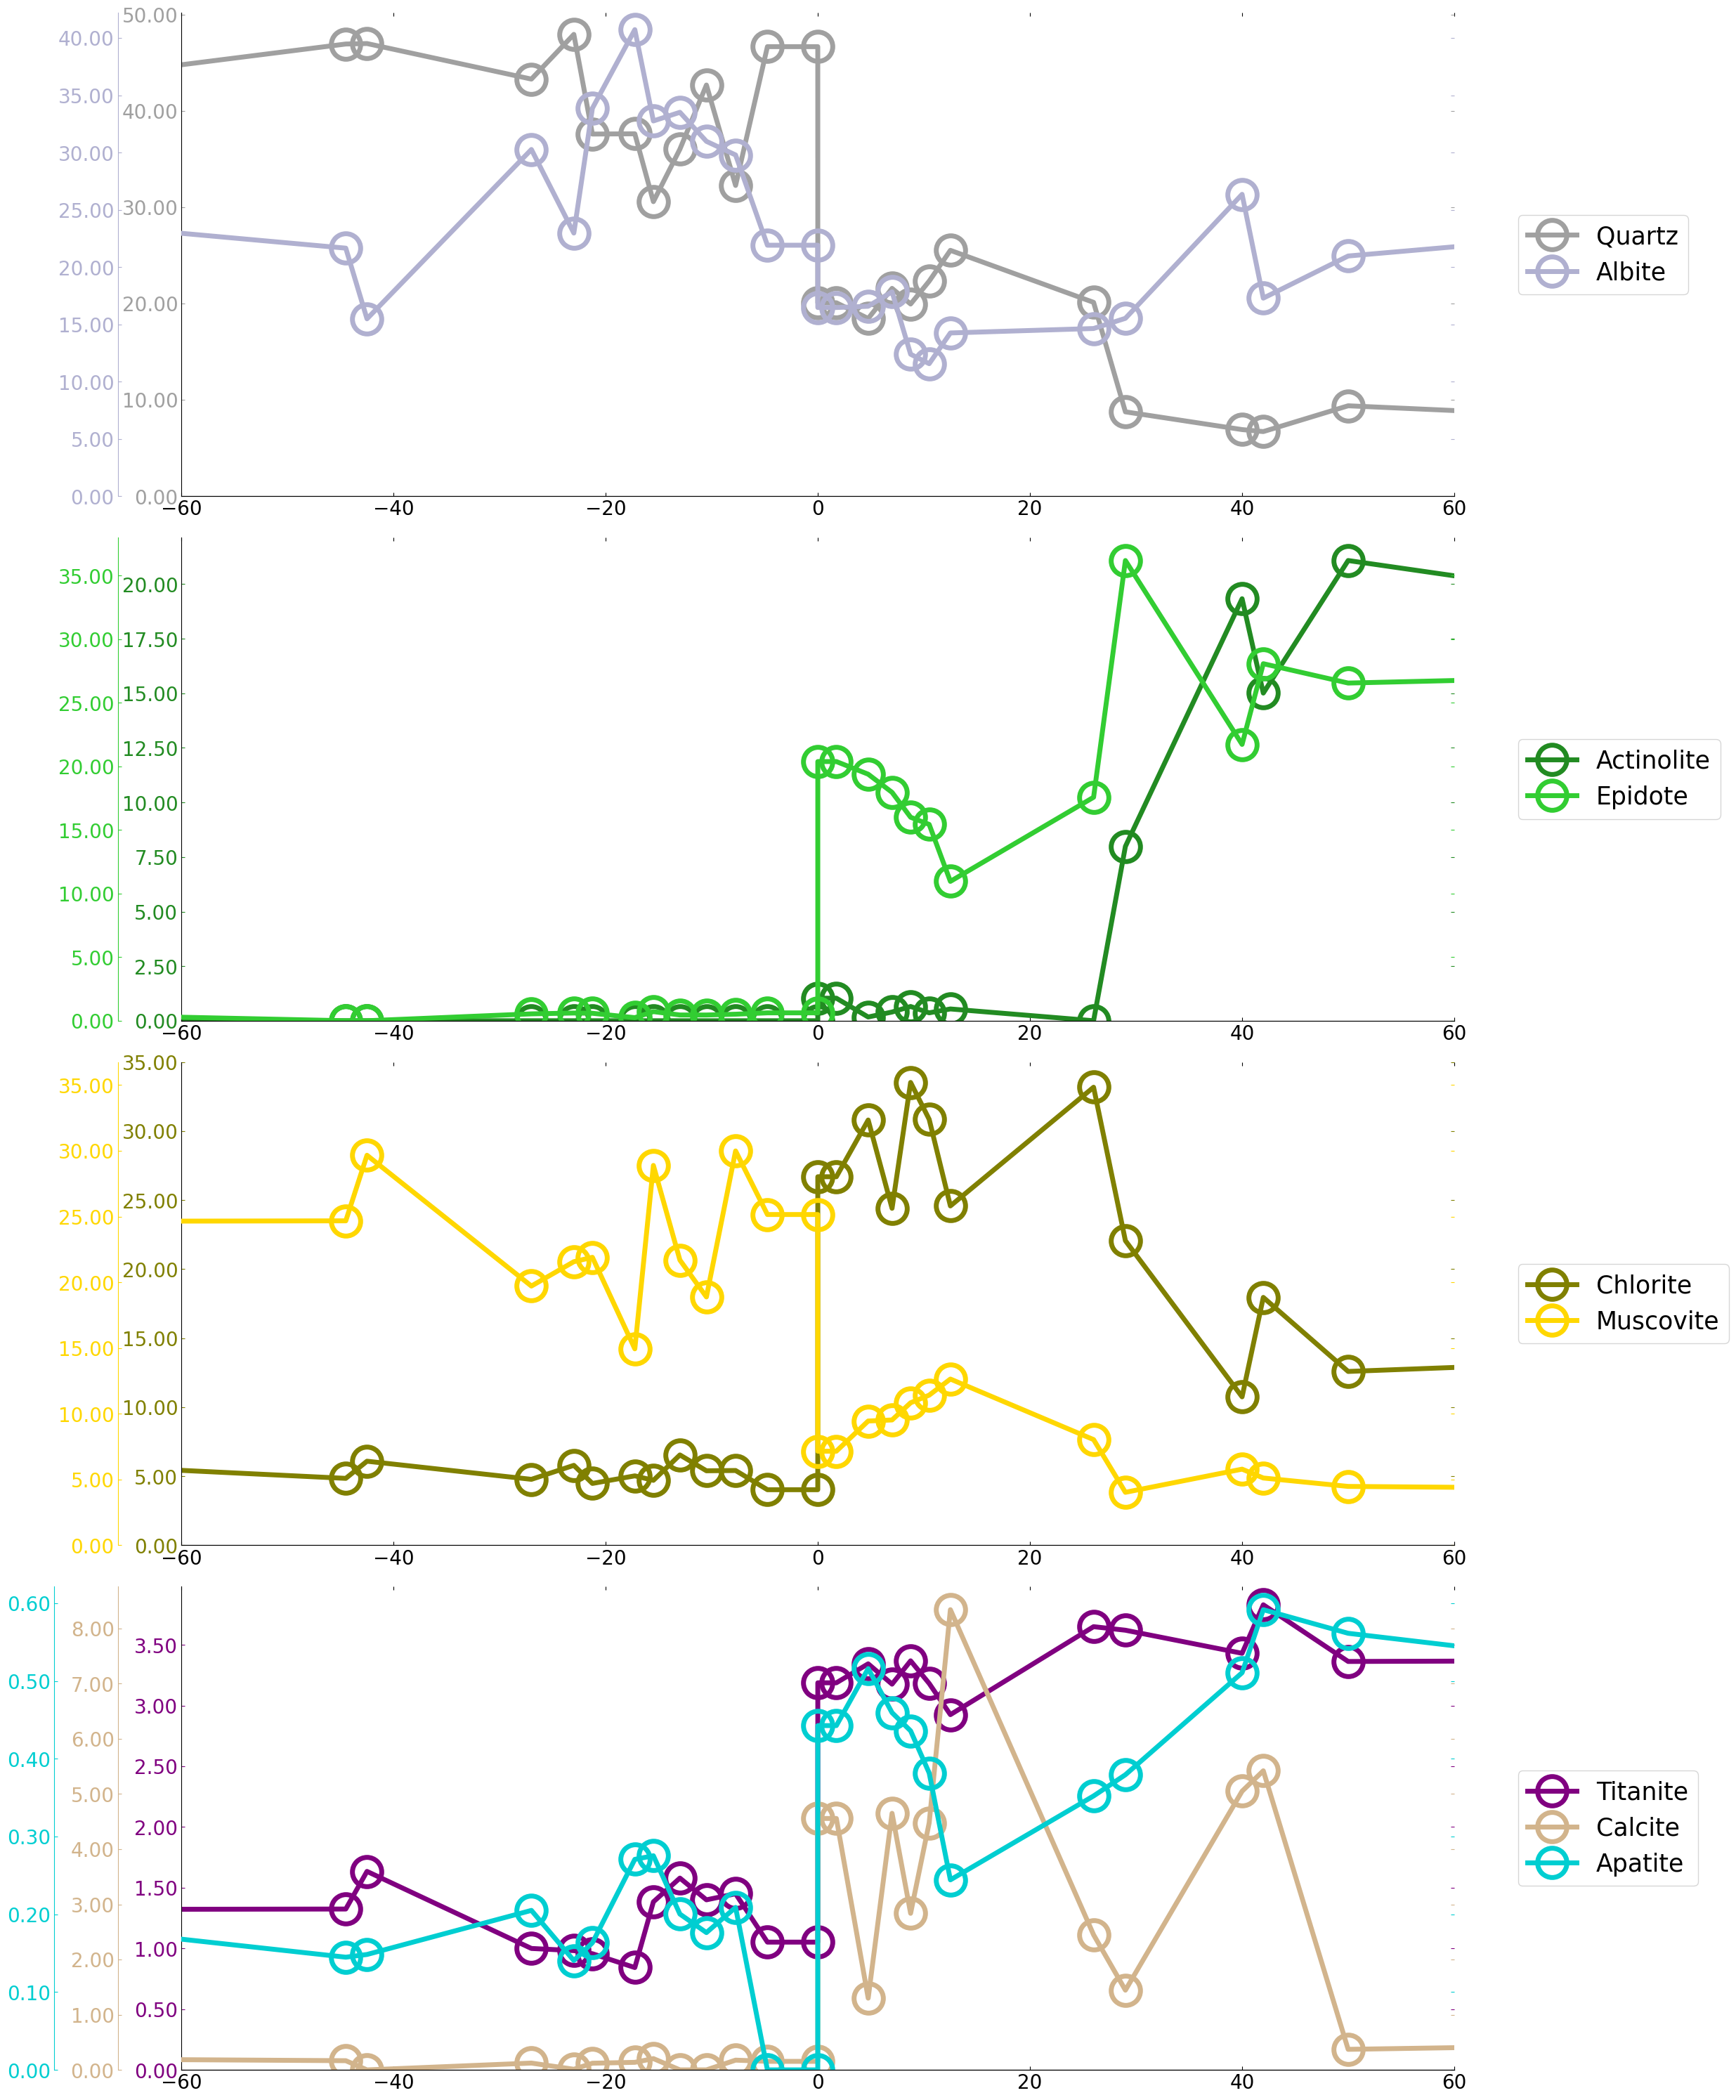

In [12]:
################################################ Data Read
limit_d = [-200, 200]
figure_xlim = [-60, 60]
use_data_mode = compile_mode_comp_data(data_mode, Mineral_Qname, Mineral_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1], )
use_data_major_comp = compile_mode_comp_data(data_comp, Major_Qname, Major_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1],)

use_data_mode[Mineral_names] = use_data_mode[Mineral_names]*100
use_data_major_comp[Major_names] = use_data_major_comp[Major_names]*100
################################################ Data Read

################################ Major/Mineral Extraction
#col_minerals = ['Albite', 'Quartz', 'Titanite', 'Calcite', 'Muscovite', 'Chlorite'] 
#col_minerals = ['Albite', 'Muscovite', 'Chlorite', 'Quartz',] 
#col_matching_mineral_c = pd.Series(Mineral_c)[pd.Series(Mineral_names).isin(col_minerals)].to_list()

#col_major = ['Na2O', 'MgO', 'Al2O3','K2O', 'CaO', 'TiO2',] # 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3'
#col_matching_major_c = pd.Series(Major_c)[pd.Series(Major_names).isin(col_major)].to_list()
################################ Major/Mineral Extraction


################################################ Figure main part setting
# サブプロットを作成
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(25, 30), gridspec_kw={'height_ratios': [5, 5, 5, 5]})
label_font_size = 25
tick_font_size = 20
path = "../0_Data/3_Figure/Bulk_composition_line.pdf"
################################################ Figure main part setting

#plot_distance(ax[0], use_data_mode, label_font_size, tick_font_size)
#plot_mineral_mode_stacked_bar(ax[1], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size)
#plot_mineral_mode_line(ax[2], use_data_mode*100, Mineral_names, Mineral_c, label_font_size, tick_font_size)
# plot_mineral_mode_stacked_area(ax[0], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size, ylim=[0, 100], xlim=[-120, 120])
# plot_major_composition_stacked_area(ax[1], use_data_major_comp, Major_names, Major_c, label_font_size, tick_font_size, ylim=[0, 100], xlim=[-120, 120])
#plot_major_composition_line(ax[2], use_data_major_comp, Major_names, Major_c, label_font_size, tick_font_size,)
#plot_major_composition_line(ax[2], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size,ylim=[0, 100], xlim=[-120, 120])
#plot_trace_elements(ax[2], use_data_comp, ["JAMSTEC_dLi", "IC"], 'viridis', label_font_size, tick_font_size, yax_loc = -0.01,)
#plot_trace_elements_with_error(ax[2], use_data_comp, ["JAMSTEC_dLi"], 0.41, 'viridis', label_font_size, tick_font_size)
#plot_composition_line(ax[2], use_data_comp, ["JAMSTEC_dLi", "IC"], 'viridis', label_font_size, tick_font_size, ylim=None, yscale="log")


col_minerals = ['Quartz', 'Albite', ] 
col_matching_colors = [mineral_dict[mineral]['Color'] for mineral in col_minerals if mineral in mineral_dict]
plot_major_mode_elements(ax[0], use_data_mode, col_minerals, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.05, xlim=figure_xlim)

col_minerals = ['Actinolite', 'Epidote', ] 
col_matching_colors = [mineral_dict[mineral]['Color'] for mineral in col_minerals if mineral in mineral_dict]
plot_major_mode_elements(ax[1], use_data_mode, col_minerals, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.05, xlim=figure_xlim)

col_minerals = ['Chlorite', 'Muscovite'] 
col_matching_colors = [mineral_dict[mineral]['Color'] for mineral in col_minerals if mineral in mineral_dict]
plot_major_mode_elements(ax[2], use_data_mode, col_minerals, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.05, xlim=figure_xlim)

col_minerals = ['Titanite', 'Calcite', 'Apatite', ] 
col_matching_colors = [mineral_dict[mineral]['Color'] for mineral in col_minerals if mineral in mineral_dict]
plot_major_mode_elements(ax[3], use_data_mode, col_minerals, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.05, xlim=figure_xlim)

plot_output(ax, path)


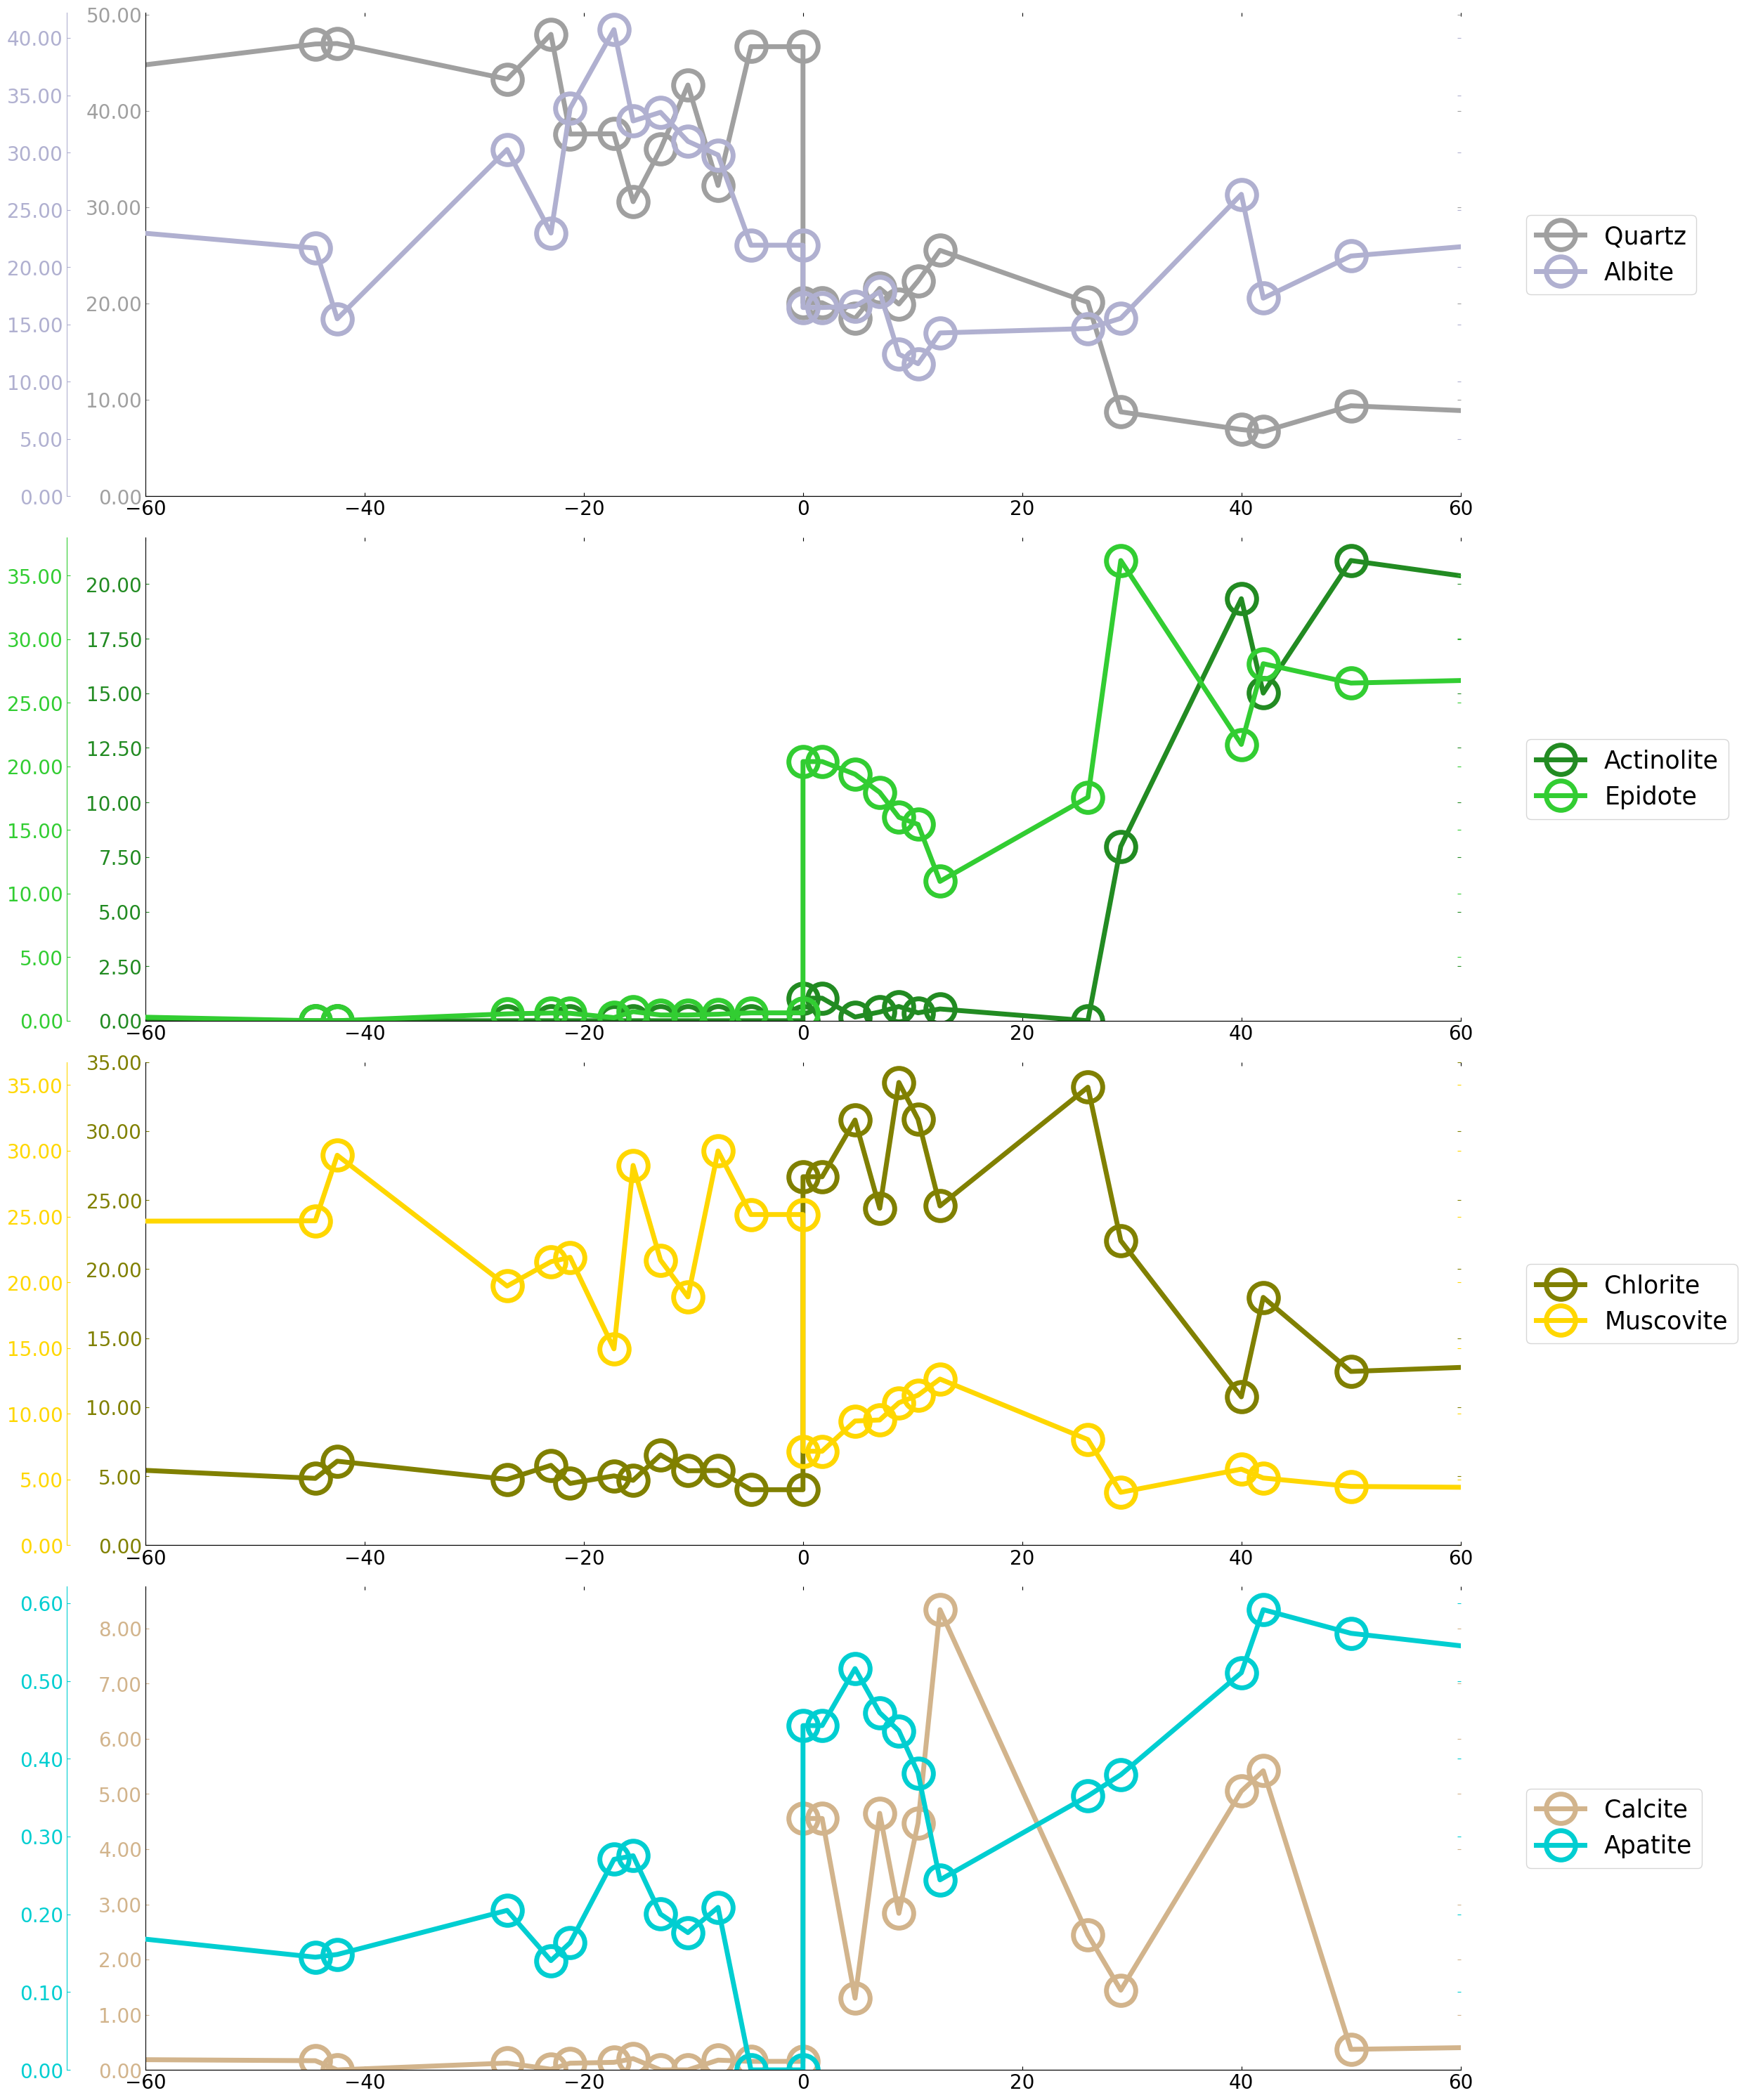

In [13]:
################################################ Data Read
limit_d = [-200, 200]
figure_xlim = [-60, 60]
use_data_mode = compile_mode_comp_data(data_mode, Mineral_Qname, Mineral_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1], )
use_data_major_comp = compile_mode_comp_data(data_comp, Major_Qname, Major_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1],)

use_data_mode[Mineral_names] = use_data_mode[Mineral_names]*100
use_data_major_comp[Major_names] = use_data_major_comp[Major_names]*100
################################################ Data Read

################################ Major/Mineral Extraction
#col_minerals = ['Albite', 'Quartz', 'Titanite', 'Calcite', 'Muscovite', 'Chlorite'] 
#col_minerals = ['Albite', 'Muscovite', 'Chlorite', 'Quartz',] 
#col_matching_mineral_c = pd.Series(Mineral_c)[pd.Series(Mineral_names).isin(col_minerals)].to_list()

#col_major = ['Na2O', 'MgO', 'Al2O3','K2O', 'CaO', 'TiO2',] # 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3'
#col_matching_major_c = pd.Series(Major_c)[pd.Series(Major_names).isin(col_major)].to_list()
################################ Major/Mineral Extraction


################################################ Figure main part setting
# サブプロットを作成
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(25, 30), gridspec_kw={'height_ratios': [5, 5, 5, 5]})
label_font_size = 25
tick_font_size = 20
path = "../0_Data/3_Figure/Mineral_Mode_line.pdf"
################################################ Figure main part setting

#plot_distance(ax[0], use_data_mode, label_font_size, tick_font_size)
#plot_mineral_mode_stacked_bar(ax[1], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size)
#plot_mineral_mode_line(ax[2], use_data_mode*100, Mineral_names, Mineral_c, label_font_size, tick_font_size)
# plot_mineral_mode_stacked_area(ax[0], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size, ylim=[0, 100], xlim=[-120, 120])
# plot_major_composition_stacked_area(ax[1], use_data_major_comp, Major_names, Major_c, label_font_size, tick_font_size, ylim=[0, 100], xlim=[-120, 120])
#plot_major_composition_line(ax[2], use_data_major_comp, Major_names, Major_c, label_font_size, tick_font_size,)
#plot_major_composition_line(ax[2], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size,ylim=[0, 100], xlim=[-120, 120])
#plot_trace_elements(ax[2], use_data_comp, ["JAMSTEC_dLi", "IC"], 'viridis', label_font_size, tick_font_size, yax_loc = -0.01,)
#plot_trace_elements_with_error(ax[2], use_data_comp, ["JAMSTEC_dLi"], 0.41, 'viridis', label_font_size, tick_font_size)
#plot_composition_line(ax[2], use_data_comp, ["JAMSTEC_dLi", "IC"], 'viridis', label_font_size, tick_font_size, ylim=None, yscale="log")


col_minerals = ['Quartz', 'Albite', ] 
col_matching_colors = [mineral_dict[mineral]['Color'] for mineral in col_minerals if mineral in mineral_dict]
plot_major_mode_elements(ax[0], use_data_mode, col_minerals, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.06, xlim=figure_xlim)

col_minerals = ['Actinolite', 'Epidote', ] 
col_matching_colors = [mineral_dict[mineral]['Color'] for mineral in col_minerals if mineral in mineral_dict]
plot_major_mode_elements(ax[1], use_data_mode, col_minerals, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.06, xlim=figure_xlim)

col_minerals = ['Chlorite', 'Muscovite'] 
col_matching_colors = [mineral_dict[mineral]['Color'] for mineral in col_minerals if mineral in mineral_dict]
plot_major_mode_elements(ax[2], use_data_mode, col_minerals, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.06, xlim=figure_xlim)

col_minerals = ['Calcite', 'Apatite'] 
col_matching_colors = [mineral_dict[mineral]['Color'] for mineral in col_minerals if mineral in mineral_dict]
plot_major_mode_elements(ax[3], use_data_mode, col_minerals, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.06, xlim=figure_xlim)

plot_output(ax, path)


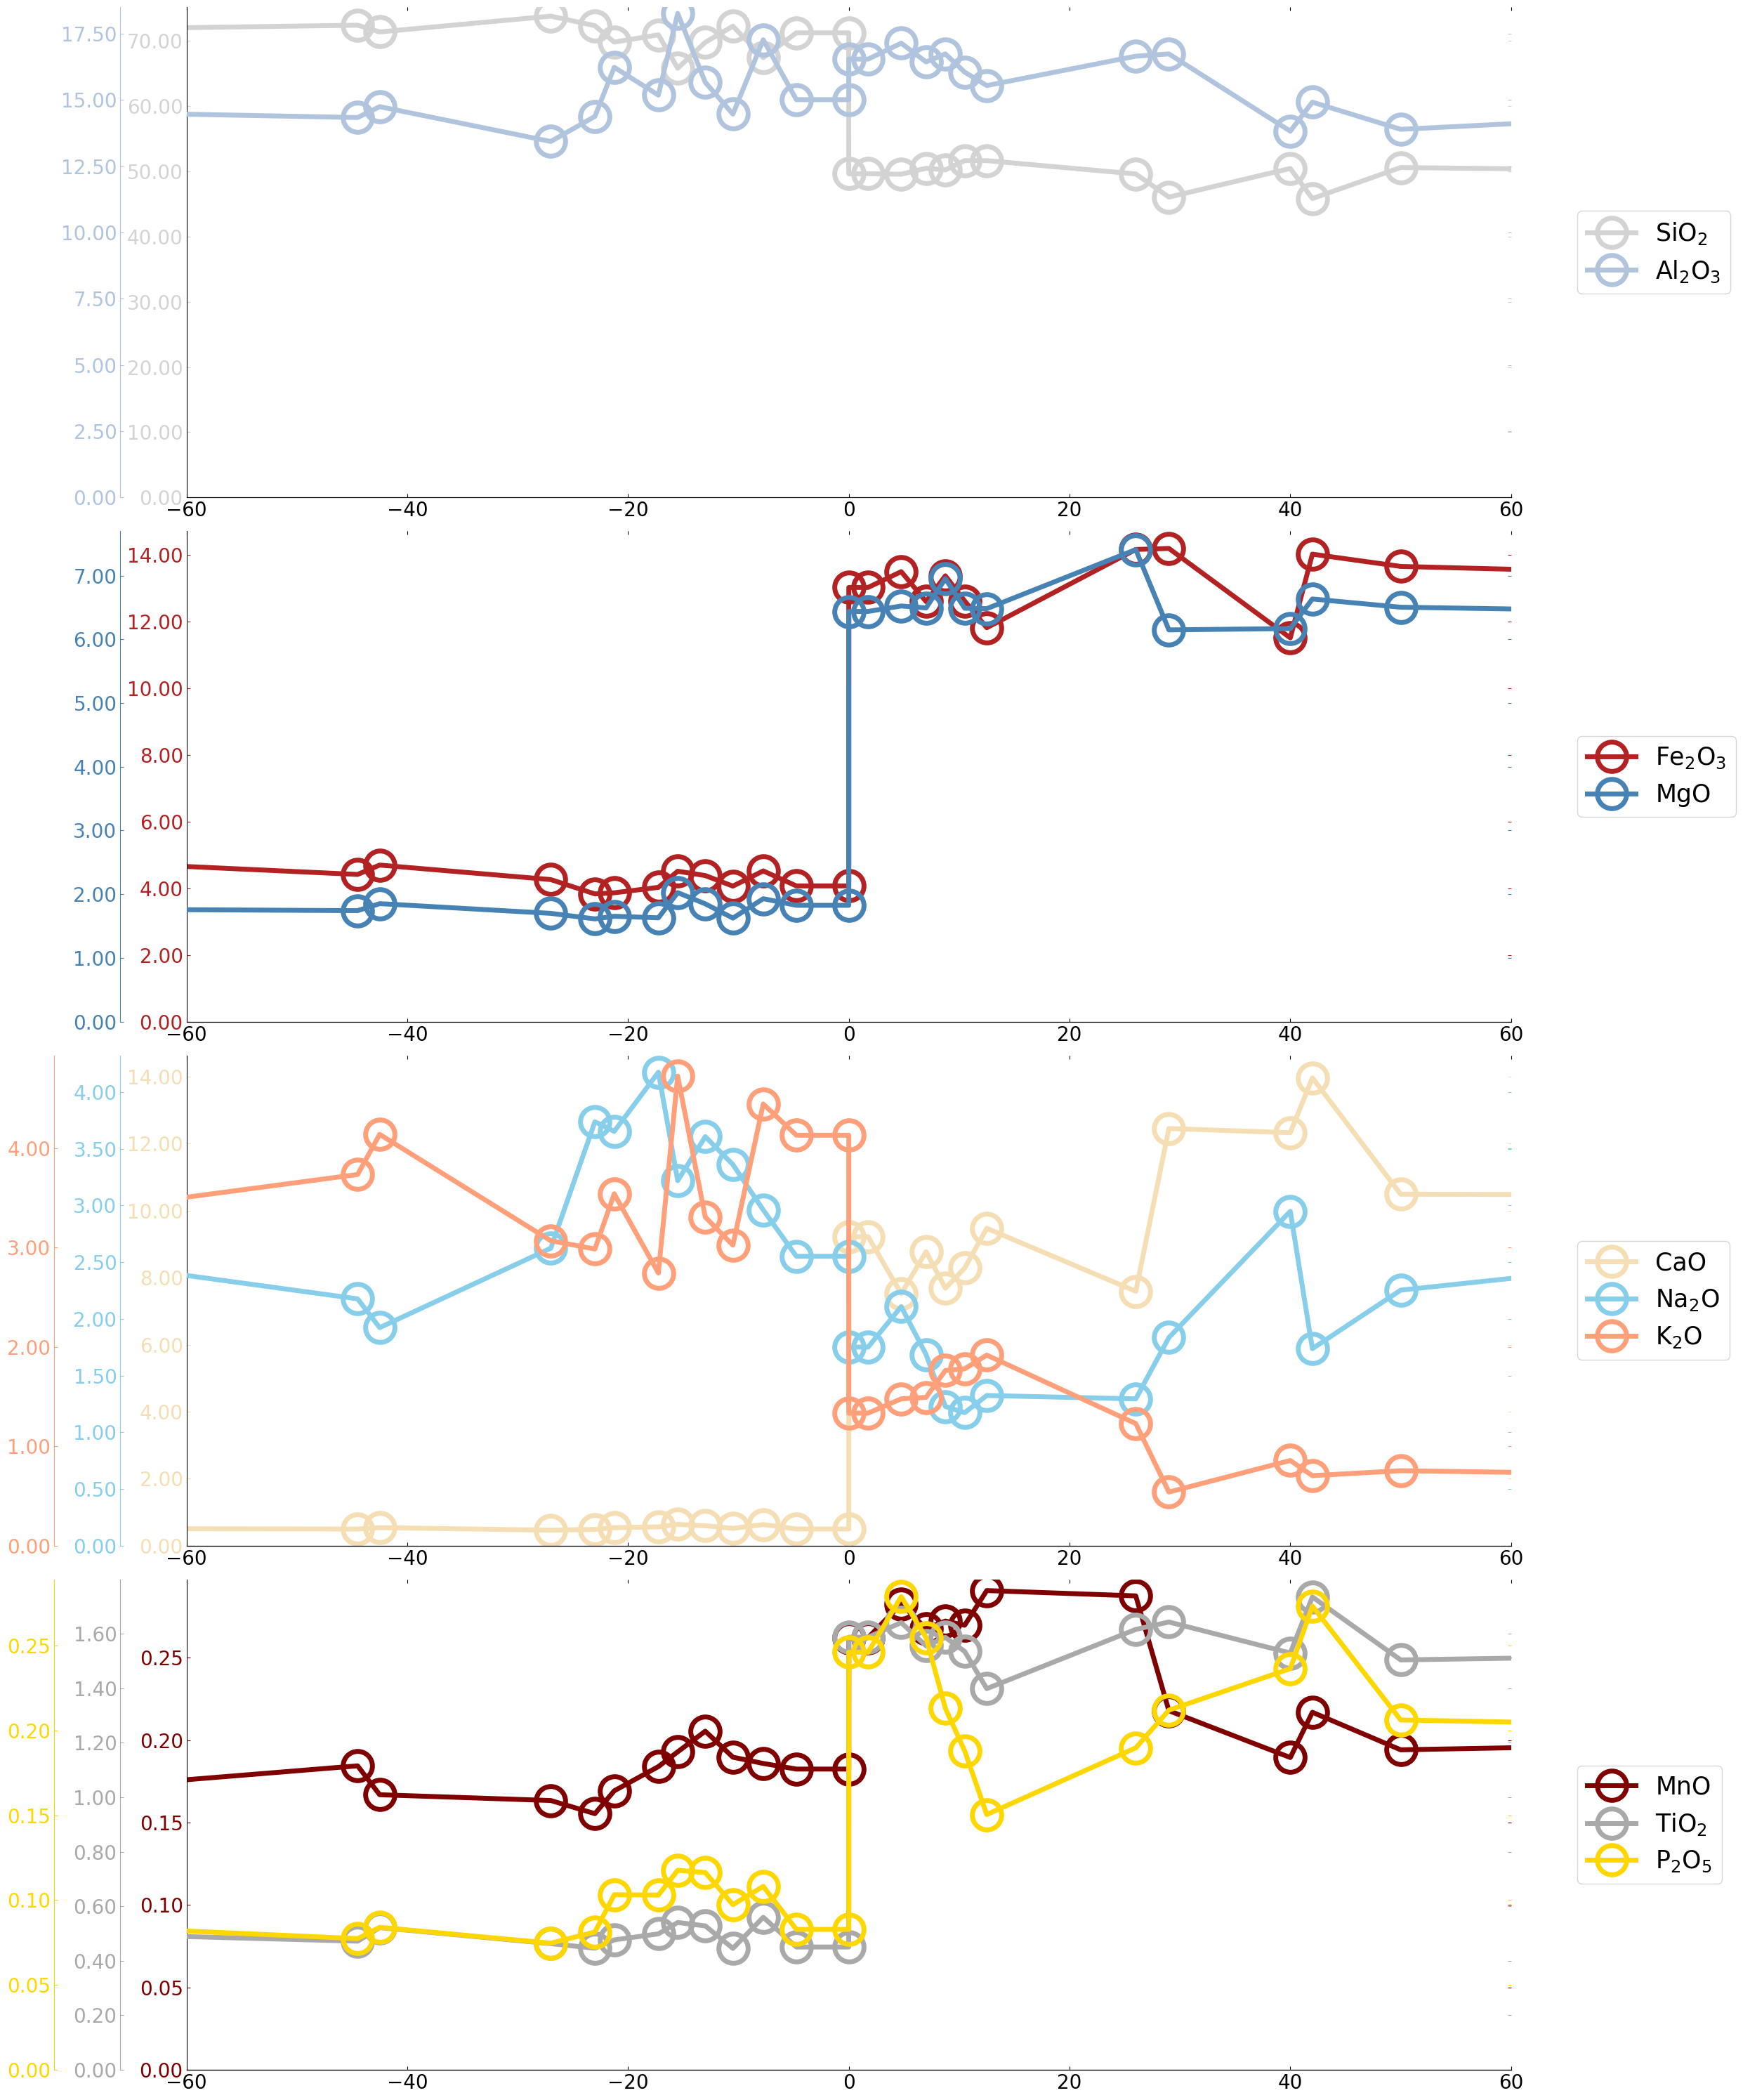

In [15]:
################################################ Data Read
limit_d = [-200, 200]
figure_xlim = [-60, 60]
use_data_mode = compile_mode_comp_data(data_mode, Mineral_Qname, Mineral_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1], )
use_data_major_comp = compile_mode_comp_data(data_comp, Major_Qname, Major_names,limit_distance_lower=limit_d[0], limit_distance_upper=limit_d[1],)

use_data_mode[Mineral_names] = use_data_mode[Mineral_names]*100
use_data_major_comp[Major_names] = use_data_major_comp[Major_names]*100
################################################ Data Read

################################ Major/Mineral Extraction
#col_minerals = ['Albite', 'Quartz', 'Titanite', 'Calcite', 'Muscovite', 'Chlorite'] 
#col_minerals = ['Albite', 'Muscovite', 'Chlorite', 'Quartz',] 
#col_matching_mineral_c = pd.Series(Mineral_c)[pd.Series(Mineral_names).isin(col_minerals)].to_list()

#col_major = ['Na2O', 'MgO', 'Al2O3','K2O', 'CaO', 'TiO2',] # 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3'
#col_matching_major_c = pd.Series(Major_c)[pd.Series(Major_names).isin(col_major)].to_list()
################################ Major/Mineral Extraction


################################################ Figure main part setting
# サブプロットを作成
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(25, 30), gridspec_kw={'height_ratios': [5, 5, 5, 5]})
label_font_size = 25
tick_font_size = 20
path = "../0_Data/3_Figure/Bulk_composition_line.pdf"
################################################ Figure main part setting

#plot_distance(ax[0], use_data_mode, label_font_size, tick_font_size)
#plot_mineral_mode_stacked_bar(ax[1], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size)
#plot_mineral_mode_line(ax[2], use_data_mode*100, Mineral_names, Mineral_c, label_font_size, tick_font_size)
# plot_mineral_mode_stacked_area(ax[0], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size, ylim=[0, 100], xlim=[-120, 120])
# plot_major_composition_stacked_area(ax[1], use_data_major_comp, Major_names, Major_c, label_font_size, tick_font_size, ylim=[0, 100], xlim=[-120, 120])
#plot_major_composition_line(ax[2], use_data_major_comp, Major_names, Major_c, label_font_size, tick_font_size,)
#plot_major_composition_line(ax[2], use_data_mode, Mineral_names, Mineral_c, label_font_size, tick_font_size,ylim=[0, 100], xlim=[-120, 120])
#plot_trace_elements(ax[2], use_data_comp, ["JAMSTEC_dLi", "IC"], 'viridis', label_font_size, tick_font_size, yax_loc = -0.01,)
#plot_trace_elements_with_error(ax[2], use_data_comp, ["JAMSTEC_dLi"], 0.41, 'viridis', label_font_size, tick_font_size)
#plot_composition_line(ax[2], use_data_comp, ["JAMSTEC_dLi", "IC"], 'viridis', label_font_size, tick_font_size, ylim=None, yscale="log")


col_major = ['SiO2', 'Al2O3',] # 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3'
col_matching_colors = [
    item['Color'] for mineral in col_major 
    for key, item in major_dict.items() if item['Mineral'] == mineral
]
plot_major_mode_elements(ax[0], use_data_major_comp, col_major, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.05, xlim=figure_xlim)


col_major = ['Fe2O3',  'MgO', ] 
col_matching_colors = [
    item['Color'] for mineral in col_major 
    for key, item in major_dict.items() if item['Mineral'] == mineral
]
plot_major_mode_elements(ax[1], use_data_major_comp, col_major, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.05, xlim=figure_xlim)

col_major = ['CaO', 'Na2O', 'K2O'] 
col_matching_colors = [
    item['Color'] for mineral in col_major 
    for key, item in major_dict.items() if item['Mineral'] == mineral
]
plot_major_mode_elements(ax[2], use_data_major_comp, col_major, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.05, xlim=figure_xlim)

col_major = ["MnO", "TiO2", "P2O5", ] 
col_matching_colors = [
    item['Color'] for mineral in col_major 
    for key, item in major_dict.items() if item['Mineral'] == mineral
]
plot_major_mode_elements(ax[3], use_data_major_comp, col_major, col_matching_colors, label_font_size, tick_font_size, yax_loc=-0.05, xlim=figure_xlim)

plot_output(ax, path)
